In [126]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# Define the generator here.
# The generator should have the following layers.
# Fully connected from # noise dimensions to 256
# LeakyReLU
# Fully connected from 256 to 512
# LeakyReLU
# Fully connected from 512 to 1024
# LeakyReLU
# Fully connected from 1024 to 784 (28*28)
# tanh (To normalize our output from -1 to 1)
def generator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(784, activation='tanh'))
    return model
    ###################################

In [128]:
# Define the discriminator here.
# Should have the following layers
# Fully connected from 784 (28*28) to 1024
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 1024 to 512
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 512 to 256
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 256 to 1
# sigmoid (to get our probability)
def discriminator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model
    ###################################

In [129]:
# Feed the generated image into the discriminator. 
# Remember that we are not updating our discriminator in this step. 
# Please refer to 
# https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers
# on how to "freeze" or set layers to be untrainable in keras.
# we can call this operation on an entire model.
def combine(generator, discriminator):
    ###################################
    #TODO: Implement
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
    ###################################

In [130]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Compile the discriminator, generator, and full GAN. 
# Probably use Adam optimizer...

#############################################
#TODO: Compile generator and discriminator
opt = Adam(lr=0.0002, beta_1=0.5)

# Discriminator
# d = None

# Generator
# g = None

# Full gan
# dg = None

d = discriminator()
d.compile(loss='binary_crossentropy', optimizer=opt)

g = generator()
g.compile(loss='binary_crossentropy', optimizer=opt)

dg = combine(g, d)
dg.compile(loss='binary_crossentropy', optimizer=opt)
#############################################

In [131]:
# Helper function to sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, 100))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


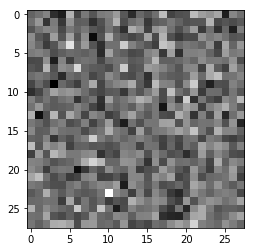

Number batches 78
0(0/78) D: 0.6363, G: 0.6867
0(1/78) D: 0.4096, G: 0.6722
0(2/78) D: 0.3802, G: 0.6585
0(3/78) D: 0.3875, G: 0.6371
0(4/78) D: 0.3995, G: 0.6212
0(5/78) D: 0.4148, G: 0.6094
0(6/78) D: 0.4237, G: 0.6045
0(7/78) D: 0.4368, G: 0.6193
0(8/78) D: 0.4296, G: 0.6381
0(9/78) D: 0.4226, G: 0.6798
0(10/78) D: 0.4105, G: 0.7318
0(11/78) D: 0.4002, G: 0.7580
0(12/78) D: 0.3866, G: 0.7857
0(13/78) D: 0.3960, G: 0.8224
0(14/78) D: 0.4012, G: 0.8074
0(15/78) D: 0.4119, G: 0.8086
0(16/78) D: 0.4271, G: 0.7773
0(17/78) D: 0.4318, G: 0.8550
0(18/78) D: 0.4344, G: 0.7639
0(19/78) D: 0.4500, G: 0.8394
0(20/78) D: 0.4359, G: 0.8764
0(21/78) D: 0.4467, G: 0.7328
0(22/78) D: 0.4909, G: 0.8078
0(23/78) D: 0.4435, G: 0.9196
0(24/78) D: 0.4846, G: 0.6199
0(25/78) D: 0.5409, G: 0.7154
0(26/78) D: 0.4765, G: 0.9562
0(27/78) D: 0.4308, G: 0.8798
0(28/78) D: 0.4098, G: 0.9632
0(29/78) D: 0.3945, G: 1.0403
0(30/78) D: 0.4095, G: 0.8490
0(31/78) D: 0.4489, G: 0.9778
0(32/78) D: 0.4556, G: 0.8162
0(

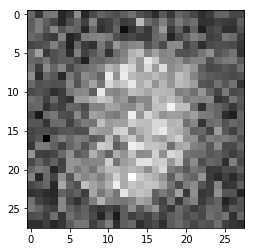

Number batches 78
1(0/78) D: 0.4739, G: 0.8030
1(1/78) D: 0.4701, G: 1.1090
1(2/78) D: 0.4314, G: 0.9882
1(3/78) D: 0.4314, G: 1.2818
1(4/78) D: 0.4555, G: 0.7659
1(5/78) D: 0.5619, G: 1.5026
1(6/78) D: 0.5967, G: 0.4916
1(7/78) D: 0.6495, G: 0.9189
1(8/78) D: 0.4100, G: 1.2667
1(9/78) D: 0.3918, G: 1.0305
1(10/78) D: 0.3804, G: 1.1500
1(11/78) D: 0.3923, G: 1.3193
1(12/78) D: 0.3816, G: 1.0645
1(13/78) D: 0.4140, G: 1.6245
1(14/78) D: 0.5011, G: 0.4529
1(15/78) D: 0.6627, G: 1.0236
1(16/78) D: 0.3235, G: 1.7692
1(17/78) D: 0.4346, G: 0.9337
1(18/78) D: 0.3600, G: 0.9634
1(19/78) D: 0.3527, G: 1.2898
1(20/78) D: 0.3228, G: 1.2029
1(21/78) D: 0.3427, G: 0.9896
1(22/78) D: 0.3815, G: 1.2074
1(23/78) D: 0.3853, G: 0.8789
1(24/78) D: 0.4028, G: 1.2125
1(25/78) D: 0.3021, G: 1.2822
1(26/78) D: 0.2560, G: 1.3841
1(27/78) D: 0.2394, G: 1.4590
1(28/78) D: 0.2346, G: 1.5372
1(29/78) D: 0.2614, G: 1.2005
1(30/78) D: 0.3289, G: 1.5874
1(31/78) D: 0.3193, G: 0.9349
1(32/78) D: 0.4073, G: 1.2943
1(

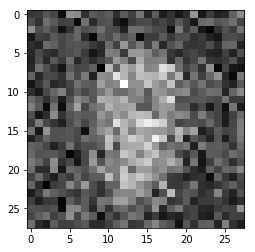

Number batches 78
2(0/78) D: 0.2211, G: 1.8004
2(1/78) D: 0.1893, G: 2.0192
2(2/78) D: 0.2045, G: 1.6110
2(3/78) D: 0.2919, G: 2.2989
2(4/78) D: 0.3657, G: 0.4865
2(5/78) D: 0.7912, G: 1.6127
2(6/78) D: 0.1955, G: 2.4703
2(7/78) D: 0.3010, G: 1.5714
2(8/78) D: 0.2121, G: 1.6025
2(9/78) D: 0.1963, G: 2.1200
2(10/78) D: 0.1315, G: 2.4017
2(11/78) D: 0.1828, G: 1.5998
2(12/78) D: 0.2392, G: 2.1606
2(13/78) D: 0.1612, G: 2.3956
2(14/78) D: 0.2060, G: 1.4505
2(15/78) D: 0.2819, G: 2.3649
2(16/78) D: 0.1526, G: 2.3117
2(17/78) D: 0.1277, G: 2.1687
2(18/78) D: 0.1508, G: 1.9978
2(19/78) D: 0.1556, G: 2.3546
2(20/78) D: 0.1278, G: 2.2843
2(21/78) D: 0.1152, G: 2.4835
2(22/78) D: 0.1142, G: 2.3753
2(23/78) D: 0.1699, G: 1.7387
2(24/78) D: 0.2098, G: 2.0811
2(25/78) D: 0.1424, G: 2.5010
2(26/78) D: 0.1213, G: 2.3341
2(27/78) D: 0.1278, G: 2.2618
2(28/78) D: 0.1407, G: 2.3974
2(29/78) D: 0.1272, G: 2.5658
2(30/78) D: 0.1098, G: 2.7570
2(31/78) D: 0.1033, G: 2.9055
2(32/78) D: 0.0825, G: 2.9179
2(

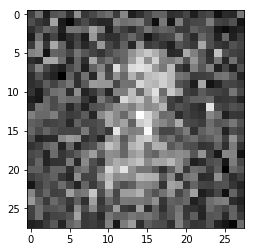

Number batches 78
3(0/78) D: 0.1017, G: 2.3912
3(1/78) D: 0.1093, G: 2.9173
3(2/78) D: 0.0727, G: 3.3832
3(3/78) D: 0.1001, G: 2.4631
3(4/78) D: 0.1353, G: 3.4505
3(5/78) D: 0.0988, G: 3.0808
3(6/78) D: 0.0952, G: 2.9496
3(7/78) D: 0.1006, G: 3.5383
3(8/78) D: 0.1389, G: 1.7899
3(9/78) D: 0.3229, G: 4.7917
3(10/78) D: 0.3078, G: 2.7487
3(11/78) D: 0.0694, G: 2.1812
3(12/78) D: 0.1392, G: 2.9577
3(13/78) D: 0.0701, G: 3.4354
3(14/78) D: 0.0834, G: 3.0781
3(15/78) D: 0.0800, G: 3.1637
3(16/78) D: 0.0955, G: 3.6620
3(17/78) D: 0.1302, G: 2.7050
3(18/78) D: 0.2048, G: 3.5506
3(19/78) D: 0.1882, G: 2.5654
3(20/78) D: 0.2178, G: 3.1635
3(21/78) D: 0.1930, G: 3.9095
3(22/78) D: 0.2517, G: 1.9410
3(23/78) D: 0.4202, G: 3.3725
3(24/78) D: 0.2897, G: 5.2269
3(25/78) D: 0.5144, G: 0.5076
3(26/78) D: 1.1301, G: 0.8591
3(27/78) D: 0.7955, G: 3.1642
3(28/78) D: 0.1256, G: 4.6212
3(29/78) D: 0.3185, G: 1.9918
3(30/78) D: 0.2604, G: 1.7147
3(31/78) D: 0.3040, G: 2.7536
3(32/78) D: 0.2439, G: 2.2676
3(

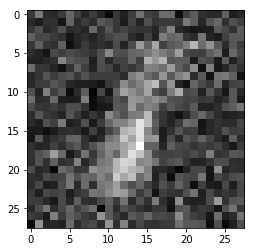

Number batches 78
4(0/78) D: 0.1548, G: 3.0158
4(1/78) D: 0.1819, G: 2.4049
4(2/78) D: 0.1759, G: 3.9548
4(3/78) D: 0.2307, G: 0.9041
4(4/78) D: 0.5834, G: 5.9973
4(5/78) D: 0.6131, G: 2.5961
4(6/78) D: 0.1329, G: 1.5674
4(7/78) D: 0.2242, G: 2.4709
4(8/78) D: 0.1617, G: 2.8676
4(9/78) D: 0.0999, G: 2.9369
4(10/78) D: 0.0983, G: 2.7841
4(11/78) D: 0.1038, G: 2.8149
4(12/78) D: 0.1466, G: 2.9856
4(13/78) D: 0.1914, G: 2.4818
4(14/78) D: 0.1804, G: 3.7016
4(15/78) D: 0.2200, G: 1.9649
4(16/78) D: 0.3447, G: 5.1400
4(17/78) D: 0.4142, G: 2.0321
4(18/78) D: 0.2702, G: 2.9496
4(19/78) D: 0.1202, G: 3.9109
4(20/78) D: 0.1161, G: 3.5090
4(21/78) D: 0.1792, G: 2.8202
4(22/78) D: 0.2207, G: 5.2445
4(23/78) D: 0.3591, G: 1.2401
4(24/78) D: 0.5121, G: 4.7206
4(25/78) D: 0.3768, G: 2.2095
4(26/78) D: 0.1914, G: 2.3088
4(27/78) D: 0.1486, G: 3.1410
4(28/78) D: 0.1169, G: 3.2466
4(29/78) D: 0.1636, G: 2.8252
4(30/78) D: 0.1941, G: 2.6498
4(31/78) D: 0.2581, G: 3.4325
4(32/78) D: 0.2451, G: 2.2074
4(

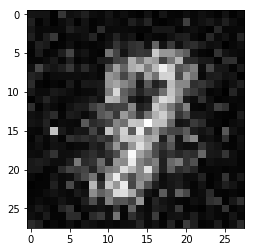

Number batches 78
5(0/78) D: 0.2371, G: 2.7663
5(1/78) D: 0.2219, G: 2.6587
5(2/78) D: 0.2009, G: 2.0883
5(3/78) D: 0.2307, G: 3.8773
5(4/78) D: 0.2209, G: 1.7181
5(5/78) D: 0.3625, G: 5.7278
5(6/78) D: 0.5309, G: 2.0480
5(7/78) D: 0.3206, G: 3.4246
5(8/78) D: 0.2036, G: 3.4338
5(9/78) D: 0.2204, G: 2.4461
5(10/78) D: 0.2421, G: 3.7805
5(11/78) D: 0.2071, G: 2.9154
5(12/78) D: 0.3181, G: 2.9338
5(13/78) D: 0.3570, G: 2.0614
5(14/78) D: 0.3990, G: 6.5172
5(15/78) D: 1.2262, G: 0.8989
5(16/78) D: 0.9574, G: 2.1787
5(17/78) D: 0.2351, G: 3.3876
5(18/78) D: 0.2893, G: 2.9158
5(19/78) D: 0.2042, G: 2.1498
5(20/78) D: 0.2294, G: 2.4012
5(21/78) D: 0.2115, G: 2.6370
5(22/78) D: 0.1946, G: 2.7885
5(23/78) D: 0.1997, G: 2.7976
5(24/78) D: 0.2081, G: 2.3793
5(25/78) D: 0.2808, G: 3.7244
5(26/78) D: 0.3745, G: 1.2343
5(27/78) D: 0.5770, G: 4.7604
5(28/78) D: 0.4946, G: 2.7194
5(29/78) D: 0.2609, G: 1.8838
5(30/78) D: 0.3320, G: 2.5070
5(31/78) D: 0.2861, G: 2.8198
5(32/78) D: 0.2642, G: 2.0377
5(

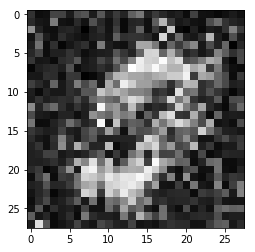

Number batches 78
6(0/78) D: 0.1825, G: 2.5453
6(1/78) D: 0.1876, G: 3.0023
6(2/78) D: 0.1912, G: 2.6855
6(3/78) D: 0.2336, G: 3.0112
6(4/78) D: 0.2353, G: 1.8947
6(5/78) D: 0.3711, G: 5.6906
6(6/78) D: 0.8766, G: 0.8371
6(7/78) D: 0.5374, G: 3.2511
6(8/78) D: 0.3760, G: 3.0946
6(9/78) D: 0.1583, G: 2.2961
6(10/78) D: 0.2026, G: 2.7759
6(11/78) D: 0.1700, G: 2.5890
6(12/78) D: 0.1948, G: 2.4827
6(13/78) D: 0.2741, G: 2.6813
6(14/78) D: 0.2912, G: 2.8082
6(15/78) D: 0.3395, G: 2.9008
6(16/78) D: 0.4099, G: 1.6584
6(17/78) D: 0.5278, G: 4.7222
6(18/78) D: 0.9235, G: 0.5107
6(19/78) D: 0.7738, G: 3.4650
6(20/78) D: 0.2911, G: 3.6025
6(21/78) D: 0.3929, G: 1.9706
6(22/78) D: 0.2805, G: 2.2957
6(23/78) D: 0.2131, G: 2.8948
6(24/78) D: 0.2125, G: 2.7040
6(25/78) D: 0.2283, G: 2.3673
6(26/78) D: 0.2487, G: 3.2106
6(27/78) D: 0.2777, G: 1.9265
6(28/78) D: 0.3859, G: 4.0420
6(29/78) D: 0.5702, G: 0.5059
6(30/78) D: 0.8696, G: 3.7089
6(31/78) D: 0.5798, G: 2.2458
6(32/78) D: 0.3064, G: 1.5418
6(

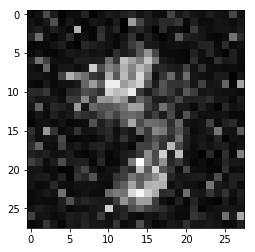

Number batches 78
7(0/78) D: 0.2339, G: 2.0385
7(1/78) D: 0.3029, G: 4.4577
7(2/78) D: 0.3688, G: 1.1001
7(3/78) D: 0.5117, G: 4.6100
7(4/78) D: 0.3518, G: 2.6336
7(5/78) D: 0.1559, G: 2.2067
7(6/78) D: 0.2153, G: 3.1634
7(7/78) D: 0.1313, G: 3.1445
7(8/78) D: 0.1563, G: 2.7070
7(9/78) D: 0.2049, G: 2.7098
7(10/78) D: 0.2280, G: 2.9405
7(11/78) D: 0.2661, G: 2.9335
7(12/78) D: 0.2402, G: 3.1389
7(13/78) D: 0.2635, G: 2.5850
7(14/78) D: 0.2896, G: 3.9879
7(15/78) D: 0.3797, G: 1.9025
7(16/78) D: 0.3779, G: 5.2310
7(17/78) D: 0.3836, G: 1.6126
7(18/78) D: 0.4599, G: 4.7656
7(19/78) D: 0.4115, G: 2.7357
7(20/78) D: 0.3449, G: 2.7960
7(21/78) D: 0.3160, G: 4.0191
7(22/78) D: 0.1246, G: 3.5401
7(23/78) D: 0.2149, G: 2.1285
7(24/78) D: 0.3007, G: 4.3676
7(25/78) D: 0.2909, G: 2.1487
7(26/78) D: 0.4019, G: 3.2072
7(27/78) D: 0.4016, G: 1.4222
7(28/78) D: 0.6726, G: 4.6867
7(29/78) D: 0.7406, G: 1.0351
7(30/78) D: 0.6718, G: 2.1976
7(31/78) D: 0.2404, G: 3.2789
7(32/78) D: 0.2601, G: 2.4733
7(

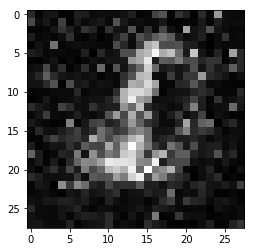

Number batches 78
8(0/78) D: 0.2137, G: 2.4655
8(1/78) D: 0.2405, G: 2.6961
8(2/78) D: 0.2075, G: 2.3381
8(3/78) D: 0.2541, G: 2.9339
8(4/78) D: 0.2906, G: 2.3061
8(5/78) D: 0.2542, G: 3.1562
8(6/78) D: 0.2412, G: 2.4276
8(7/78) D: 0.2730, G: 2.7852
8(8/78) D: 0.2811, G: 3.1399
8(9/78) D: 0.2511, G: 2.8203
8(10/78) D: 0.2505, G: 4.0186
8(11/78) D: 0.3353, G: 1.0060
8(12/78) D: 0.6338, G: 5.6446
8(13/78) D: 1.0266, G: 1.3251
8(14/78) D: 0.5273, G: 1.6619
8(15/78) D: 0.2823, G: 2.9801
8(16/78) D: 0.1765, G: 3.2276
8(17/78) D: 0.2267, G: 2.3586
8(18/78) D: 0.1855, G: 2.3010
8(19/78) D: 0.1885, G: 2.4957
8(20/78) D: 0.1754, G: 2.7746
8(21/78) D: 0.2252, G: 2.4076
8(22/78) D: 0.2008, G: 2.6358
8(23/78) D: 0.2765, G: 1.4673
8(24/78) D: 0.3177, G: 3.6898
8(25/78) D: 0.5226, G: 0.7550
8(26/78) D: 0.5655, G: 3.2539
8(27/78) D: 0.3881, G: 2.4229
8(28/78) D: 0.2034, G: 2.0169
8(29/78) D: 0.2058, G: 2.3635
8(30/78) D: 0.1977, G: 2.3792
8(31/78) D: 0.1743, G: 2.8060
8(32/78) D: 0.2109, G: 1.9459
8(

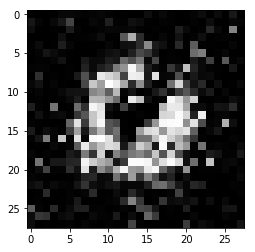

Number batches 78
9(0/78) D: 0.8936, G: 1.3059
9(1/78) D: 0.2952, G: 1.5894
9(2/78) D: 0.3238, G: 2.4425
9(3/78) D: 0.2502, G: 2.4900
9(4/78) D: 0.2019, G: 2.2291
9(5/78) D: 0.1653, G: 2.4839
9(6/78) D: 0.2374, G: 2.8686
9(7/78) D: 0.2175, G: 3.0941
9(8/78) D: 0.2314, G: 2.6886
9(9/78) D: 0.2163, G: 2.6734
9(10/78) D: 0.2408, G: 3.3532
9(11/78) D: 0.3211, G: 1.4306
9(12/78) D: 0.4011, G: 4.4738
9(13/78) D: 0.6280, G: 1.0746
9(14/78) D: 0.4315, G: 2.5732
9(15/78) D: 0.1909, G: 3.7116
9(16/78) D: 0.1323, G: 3.5849
9(17/78) D: 0.1519, G: 2.4104
9(18/78) D: 0.2559, G: 2.0770
9(19/78) D: 0.2744, G: 2.2336
9(20/78) D: 0.2157, G: 2.9713
9(21/78) D: 0.1876, G: 2.7829
9(22/78) D: 0.2412, G: 1.9799
9(23/78) D: 0.2902, G: 2.5994
9(24/78) D: 0.3035, G: 2.1280
9(25/78) D: 0.2475, G: 2.9631
9(26/78) D: 0.2282, G: 2.3123
9(27/78) D: 0.2985, G: 3.1733
9(28/78) D: 0.2630, G: 1.6573
9(29/78) D: 0.3430, G: 4.1463
9(30/78) D: 0.3614, G: 1.6810
9(31/78) D: 0.2963, G: 3.3713
9(32/78) D: 0.2128, G: 2.8669
9(

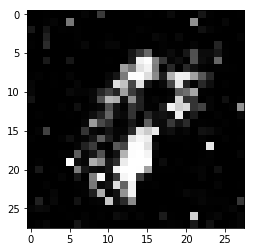

Number batches 78
10(0/78) D: 0.1737, G: 2.5755
10(1/78) D: 0.1976, G: 2.9711
10(2/78) D: 0.1793, G: 2.8142
10(3/78) D: 0.2152, G: 2.6743
10(4/78) D: 0.2064, G: 3.0501
10(5/78) D: 0.2143, G: 2.6270
10(6/78) D: 0.2229, G: 3.9926
10(7/78) D: 0.2620, G: 2.1521
10(8/78) D: 0.3099, G: 4.6572
10(9/78) D: 0.4278, G: 2.0770
10(10/78) D: 0.3133, G: 3.9326
10(11/78) D: 0.3148, G: 2.4082
10(12/78) D: 0.2500, G: 3.4045
10(13/78) D: 0.1735, G: 3.4266
10(14/78) D: 0.1673, G: 3.3517
10(15/78) D: 0.1867, G: 4.0018
10(16/78) D: 0.2390, G: 2.9263
10(17/78) D: 0.2329, G: 4.5347
10(18/78) D: 0.3306, G: 1.0159
10(19/78) D: 0.7763, G: 8.3782
10(20/78) D: 1.2006, G: 3.5388
10(21/78) D: 0.1986, G: 1.7300
10(22/78) D: 0.4558, G: 3.0304
10(23/78) D: 0.1874, G: 3.2257
10(24/78) D: 0.1995, G: 2.5870
10(25/78) D: 0.2062, G: 2.3650
10(26/78) D: 0.1722, G: 2.5861
10(27/78) D: 0.1771, G: 2.6668
10(28/78) D: 0.1889, G: 2.8368
10(29/78) D: 0.1398, G: 2.7924
10(30/78) D: 0.1557, G: 2.9313
10(31/78) D: 0.1566, G: 3.0212


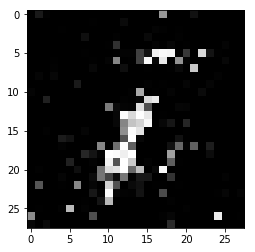

Number batches 78
11(0/78) D: 0.1589, G: 3.6598
11(1/78) D: 0.1957, G: 1.8817
11(2/78) D: 0.3349, G: 6.5495
11(3/78) D: 0.8977, G: 0.5029
11(4/78) D: 0.8921, G: 3.1586
11(5/78) D: 0.1959, G: 3.6353
11(6/78) D: 0.2095, G: 2.8130
11(7/78) D: 0.1985, G: 2.0668
11(8/78) D: 0.2554, G: 1.9889
11(9/78) D: 0.1759, G: 2.5745
11(10/78) D: 0.1968, G: 3.0585
11(11/78) D: 0.1793, G: 2.6562
11(12/78) D: 0.1965, G: 2.4733
11(13/78) D: 0.2684, G: 2.8643
11(14/78) D: 0.2959, G: 2.3474
11(15/78) D: 0.2911, G: 3.4444
11(16/78) D: 0.3272, G: 2.2072
11(17/78) D: 0.3272, G: 3.4098
11(18/78) D: 0.2897, G: 1.5543
11(19/78) D: 0.3724, G: 3.5297
11(20/78) D: 0.2711, G: 2.2750
11(21/78) D: 0.2902, G: 2.4416
11(22/78) D: 0.2742, G: 3.3878
11(23/78) D: 0.3235, G: 1.2595
11(24/78) D: 0.4744, G: 5.1745
11(25/78) D: 0.7145, G: 0.8497
11(26/78) D: 0.5765, G: 2.5397
11(27/78) D: 0.2845, G: 3.7692
11(28/78) D: 0.2767, G: 2.9450
11(29/78) D: 0.2029, G: 1.7226
11(30/78) D: 0.2184, G: 2.3812
11(31/78) D: 0.1872, G: 3.0020


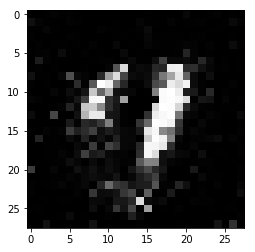

Number batches 78
12(0/78) D: 0.3336, G: 1.6891
12(1/78) D: 0.3292, G: 4.2541
12(2/78) D: 0.4717, G: 1.6865
12(3/78) D: 0.3078, G: 2.1399
12(4/78) D: 0.2468, G: 2.9209
12(5/78) D: 0.2336, G: 2.1902
12(6/78) D: 0.2001, G: 2.5118
12(7/78) D: 0.2229, G: 2.4711
12(8/78) D: 0.2829, G: 2.1473
12(9/78) D: 0.2633, G: 3.6606
12(10/78) D: 0.2290, G: 2.2324
12(11/78) D: 0.2419, G: 2.3062
12(12/78) D: 0.2456, G: 3.3885
12(13/78) D: 0.3014, G: 1.2024
12(14/78) D: 0.4844, G: 5.8735
12(15/78) D: 0.6550, G: 2.2731
12(16/78) D: 0.2569, G: 1.4610
12(17/78) D: 0.2598, G: 2.8550
12(18/78) D: 0.2934, G: 2.8472
12(19/78) D: 0.2612, G: 1.7552
12(20/78) D: 0.2409, G: 2.4155
12(21/78) D: 0.1730, G: 2.7691
12(22/78) D: 0.1777, G: 2.8104
12(23/78) D: 0.2136, G: 2.5514
12(24/78) D: 0.2113, G: 2.3186
12(25/78) D: 0.2106, G: 2.4354
12(26/78) D: 0.2072, G: 2.5601
12(27/78) D: 0.2187, G: 2.7373
12(28/78) D: 0.2056, G: 2.6857
12(29/78) D: 0.1985, G: 2.9601
12(30/78) D: 0.2405, G: 1.9112
12(31/78) D: 0.2726, G: 4.0805


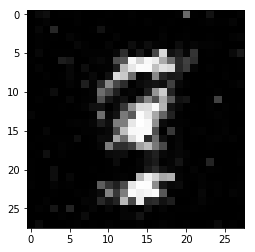

Number batches 78
13(0/78) D: 0.2738, G: 3.5533
13(1/78) D: 0.2205, G: 2.7359
13(2/78) D: 0.2051, G: 1.9030
13(3/78) D: 0.2415, G: 3.2636
13(4/78) D: 0.2027, G: 2.3332
13(5/78) D: 0.1981, G: 2.7053
13(6/78) D: 0.1883, G: 3.5170
13(7/78) D: 0.2454, G: 1.5957
13(8/78) D: 0.2543, G: 4.2062
13(9/78) D: 0.2524, G: 2.8912
13(10/78) D: 0.1549, G: 2.2378
13(11/78) D: 0.2742, G: 3.5834
13(12/78) D: 0.2223, G: 2.5665
13(13/78) D: 0.2110, G: 2.0089
13(14/78) D: 0.2530, G: 5.2661
13(15/78) D: 0.3469, G: 2.9213
13(16/78) D: 0.2133, G: 1.7832
13(17/78) D: 0.2457, G: 4.3372
13(18/78) D: 0.3897, G: 1.9208
13(19/78) D: 0.2053, G: 2.8088
13(20/78) D: 0.2156, G: 2.6822
13(21/78) D: 0.2294, G: 2.4532
13(22/78) D: 0.1966, G: 2.4626
13(23/78) D: 0.2063, G: 3.1919
13(24/78) D: 0.2756, G: 1.7579
13(25/78) D: 0.2907, G: 3.8915
13(26/78) D: 0.2507, G: 2.7155
13(27/78) D: 0.1732, G: 2.3709
13(28/78) D: 0.2154, G: 4.0181
13(29/78) D: 0.2320, G: 2.4630
13(30/78) D: 0.2225, G: 2.4548
13(31/78) D: 0.1636, G: 3.2788


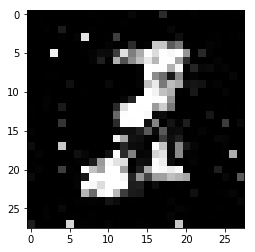

Number batches 78
14(0/78) D: 0.2353, G: 3.1287
14(1/78) D: 0.2492, G: 1.9660
14(2/78) D: 0.2539, G: 3.0669
14(3/78) D: 0.2931, G: 2.2466
14(4/78) D: 0.2367, G: 3.1611
14(5/78) D: 0.2781, G: 1.9056
14(6/78) D: 0.2619, G: 3.5210
14(7/78) D: 0.2490, G: 2.9228
14(8/78) D: 0.2824, G: 1.8807
14(9/78) D: 0.2848, G: 3.3341
14(10/78) D: 0.2191, G: 3.1139
14(11/78) D: 0.2213, G: 2.6220
14(12/78) D: 0.2600, G: 2.6391
14(13/78) D: 0.2803, G: 3.0069
14(14/78) D: 0.2124, G: 3.2265
14(15/78) D: 0.2583, G: 2.2079
14(16/78) D: 0.2779, G: 4.9383
14(17/78) D: 0.4304, G: 1.3721
14(18/78) D: 0.3917, G: 4.0988
14(19/78) D: 0.2635, G: 2.6928
14(20/78) D: 0.1801, G: 2.2410
14(21/78) D: 0.2280, G: 3.0001
14(22/78) D: 0.1862, G: 2.6793
14(23/78) D: 0.1596, G: 2.9182
14(24/78) D: 0.1863, G: 2.3990
14(25/78) D: 0.2339, G: 2.8394
14(26/78) D: 0.2061, G: 2.8512
14(27/78) D: 0.2388, G: 1.9271
14(28/78) D: 0.2971, G: 4.9241
14(29/78) D: 0.4457, G: 1.7454
14(30/78) D: 0.3482, G: 3.2961
14(31/78) D: 0.2052, G: 2.5052


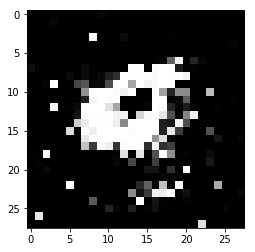

Number batches 78
15(0/78) D: 0.2169, G: 3.3247
15(1/78) D: 0.1893, G: 2.3315
15(2/78) D: 0.1658, G: 3.0485
15(3/78) D: 0.1827, G: 3.2343
15(4/78) D: 0.1277, G: 2.6196
15(5/78) D: 0.1687, G: 3.2150
15(6/78) D: 0.1420, G: 3.2001
15(7/78) D: 0.1516, G: 4.0622
15(8/78) D: 0.2697, G: 1.7262
15(9/78) D: 0.3233, G: 5.9486
15(10/78) D: 0.4613, G: 2.7401
15(11/78) D: 0.1718, G: 1.9423
15(12/78) D: 0.2340, G: 4.1009
15(13/78) D: 0.3252, G: 2.6132
15(14/78) D: 0.1828, G: 2.4984
15(15/78) D: 0.1814, G: 2.8150
15(16/78) D: 0.1514, G: 2.6165
15(17/78) D: 0.1730, G: 3.5627
15(18/78) D: 0.1597, G: 3.0981
15(19/78) D: 0.1380, G: 3.1818
15(20/78) D: 0.2235, G: 2.7994
15(21/78) D: 0.2131, G: 3.1859
15(22/78) D: 0.2022, G: 2.3610
15(23/78) D: 0.2198, G: 3.8271
15(24/78) D: 0.3315, G: 1.1813
15(25/78) D: 0.5495, G: 6.3433
15(26/78) D: 0.7449, G: 4.2515
15(27/78) D: 0.3682, G: 2.1290
15(28/78) D: 0.3141, G: 2.2440
15(29/78) D: 0.2578, G: 2.9148
15(30/78) D: 0.1679, G: 2.3962
15(31/78) D: 0.1796, G: 2.3940


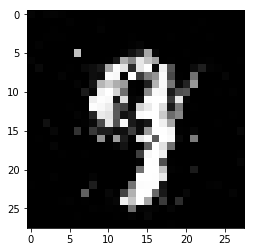

Number batches 78
16(0/78) D: 0.1741, G: 2.8565
16(1/78) D: 0.2172, G: 2.9210
16(2/78) D: 0.2143, G: 2.2881
16(3/78) D: 0.1767, G: 2.9531
16(4/78) D: 0.1627, G: 3.3008
16(5/78) D: 0.1922, G: 2.8836
16(6/78) D: 0.1495, G: 2.5872
16(7/78) D: 0.1585, G: 3.4529
16(8/78) D: 0.2112, G: 2.1173
16(9/78) D: 0.1964, G: 3.5512
16(10/78) D: 0.1756, G: 2.9918
16(11/78) D: 0.1790, G: 2.7339
16(12/78) D: 0.1827, G: 3.1795
16(13/78) D: 0.1713, G: 2.4800
16(14/78) D: 0.1431, G: 3.7049
16(15/78) D: 0.1731, G: 2.6687
16(16/78) D: 0.1534, G: 2.8679
16(17/78) D: 0.1246, G: 3.4967
16(18/78) D: 0.1453, G: 3.1783
16(19/78) D: 0.0992, G: 3.5215
16(20/78) D: 0.1257, G: 3.6990
16(21/78) D: 0.1175, G: 2.9135
16(22/78) D: 0.1493, G: 4.3474
16(23/78) D: 0.1705, G: 2.9402
16(24/78) D: 0.1357, G: 3.6152
16(25/78) D: 0.1063, G: 3.6045
16(26/78) D: 0.2000, G: 1.9932
16(27/78) D: 0.2618, G: 6.1548
16(28/78) D: 0.4621, G: 3.7507
16(29/78) D: 0.1376, G: 2.0992
16(30/78) D: 0.2407, G: 3.7032
16(31/78) D: 0.1407, G: 3.5631


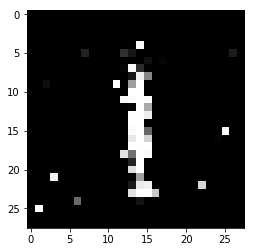

Number batches 78
17(0/78) D: 0.2713, G: 4.2953
17(1/78) D: 0.3018, G: 2.0215
17(2/78) D: 0.2882, G: 2.6063
17(3/78) D: 0.2338, G: 2.2582
17(4/78) D: 0.2498, G: 3.2818
17(5/78) D: 0.2082, G: 2.4460
17(6/78) D: 0.1901, G: 2.5711
17(7/78) D: 0.1956, G: 3.4034
17(8/78) D: 0.2800, G: 1.8880
17(9/78) D: 0.2880, G: 3.5866
17(10/78) D: 0.2085, G: 3.0865
17(11/78) D: 0.2743, G: 2.0192
17(12/78) D: 0.2260, G: 3.8537
17(13/78) D: 0.2607, G: 2.2521
17(14/78) D: 0.1862, G: 2.7083
17(15/78) D: 0.2378, G: 2.5030
17(16/78) D: 0.2039, G: 2.9623
17(17/78) D: 0.1740, G: 3.1562
17(18/78) D: 0.1887, G: 2.4395
17(19/78) D: 0.1917, G: 3.4719
17(20/78) D: 0.1651, G: 2.6361
17(21/78) D: 0.2096, G: 2.4565
17(22/78) D: 0.1938, G: 3.6006
17(23/78) D: 0.1516, G: 2.9211
17(24/78) D: 0.1450, G: 2.3627
17(25/78) D: 0.1986, G: 3.9638
17(26/78) D: 0.2373, G: 1.7462
17(27/78) D: 0.2758, G: 5.0745
17(28/78) D: 0.2714, G: 4.2045
17(29/78) D: 0.2749, G: 1.1357
17(30/78) D: 0.3480, G: 4.5269
17(31/78) D: 0.2429, G: 4.5174


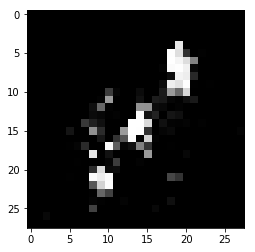

Number batches 78
18(0/78) D: 0.1884, G: 2.7390
18(1/78) D: 0.1513, G: 3.2414
18(2/78) D: 0.1775, G: 2.7916
18(3/78) D: 0.2300, G: 2.5693
18(4/78) D: 0.1723, G: 2.9745
18(5/78) D: 0.1450, G: 2.8419
18(6/78) D: 0.1235, G: 2.7125
18(7/78) D: 0.1632, G: 3.0165
18(8/78) D: 0.1842, G: 2.0802
18(9/78) D: 0.1763, G: 4.7264
18(10/78) D: 0.1668, G: 4.4300
18(11/78) D: 0.2600, G: 1.6632
18(12/78) D: 0.2357, G: 3.9517
18(13/78) D: 0.2334, G: 3.4626
18(14/78) D: 0.1260, G: 2.5808
18(15/78) D: 0.1373, G: 2.9038
18(16/78) D: 0.1509, G: 2.5654
18(17/78) D: 0.1382, G: 3.4200
18(18/78) D: 0.1692, G: 2.8725
18(19/78) D: 0.1502, G: 3.2762
18(20/78) D: 0.1262, G: 2.8701
18(21/78) D: 0.1521, G: 2.3116
18(22/78) D: 0.1565, G: 3.1761
18(23/78) D: 0.1621, G: 2.8451
18(24/78) D: 0.1603, G: 2.2714
18(25/78) D: 0.1604, G: 4.2469
18(26/78) D: 0.2153, G: 2.9698
18(27/78) D: 0.1698, G: 2.3348
18(28/78) D: 0.1440, G: 3.6038
18(29/78) D: 0.1699, G: 2.9598
18(30/78) D: 0.1612, G: 2.2035
18(31/78) D: 0.1378, G: 4.0082


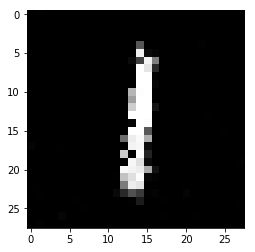

Number batches 78
19(0/78) D: 0.1747, G: 2.9008
19(1/78) D: 0.1011, G: 3.5992
19(2/78) D: 0.1891, G: 2.5691
19(3/78) D: 0.1872, G: 2.6514
19(4/78) D: 0.1381, G: 3.4405
19(5/78) D: 0.1307, G: 3.0070
19(6/78) D: 0.1058, G: 3.6107
19(7/78) D: 0.1039, G: 2.7302
19(8/78) D: 0.1399, G: 2.6712
19(9/78) D: 0.1171, G: 3.6211
19(10/78) D: 0.0605, G: 4.3420
19(11/78) D: 0.1772, G: 2.8193
19(12/78) D: 0.1563, G: 3.1266
19(13/78) D: 0.1592, G: 2.6511
19(14/78) D: 0.1309, G: 3.8727
19(15/78) D: 0.0935, G: 3.6026
19(16/78) D: 0.1654, G: 2.2046
19(17/78) D: 0.1412, G: 4.3200
19(18/78) D: 0.1816, G: 3.5828
19(19/78) D: 0.1523, G: 2.0984
19(20/78) D: 0.2020, G: 4.1586
19(21/78) D: 0.2279, G: 3.1523
19(22/78) D: 0.1195, G: 2.3741
19(23/78) D: 0.1420, G: 3.3447
19(24/78) D: 0.1417, G: 3.0251
19(25/78) D: 0.1205, G: 2.2027
19(26/78) D: 0.1996, G: 3.5172
19(27/78) D: 0.1788, G: 2.6222
19(28/78) D: 0.1091, G: 3.1500
19(29/78) D: 0.1467, G: 3.2269
19(30/78) D: 0.1381, G: 2.5782
19(31/78) D: 0.1246, G: 3.3486


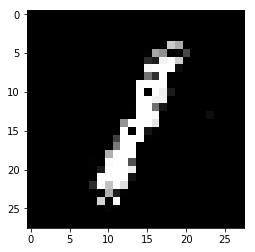

Number batches 78
20(0/78) D: 0.1234, G: 3.0533
20(1/78) D: 0.0997, G: 4.4938
20(2/78) D: 0.2069, G: 2.7419
20(3/78) D: 0.1532, G: 2.9408
20(4/78) D: 0.1006, G: 4.1137
20(5/78) D: 0.1033, G: 3.2988
20(6/78) D: 0.0803, G: 3.4125
20(7/78) D: 0.0829, G: 3.8938
20(8/78) D: 0.1311, G: 2.5070
20(9/78) D: 0.1340, G: 4.8832
20(10/78) D: 0.1182, G: 4.3622
20(11/78) D: 0.1579, G: 2.4990
20(12/78) D: 0.1319, G: 3.6405
20(13/78) D: 0.1352, G: 2.9696
20(14/78) D: 0.1126, G: 3.9583
20(15/78) D: 0.1126, G: 3.1509
20(16/78) D: 0.1374, G: 3.0547
20(17/78) D: 0.1158, G: 3.0006
20(18/78) D: 0.1454, G: 3.9899
20(19/78) D: 0.1239, G: 2.7849
20(20/78) D: 0.1577, G: 3.8112
20(21/78) D: 0.1620, G: 2.9885
20(22/78) D: 0.1671, G: 3.0307
20(23/78) D: 0.1117, G: 4.0651
20(24/78) D: 0.1668, G: 2.3040
20(25/78) D: 0.1495, G: 4.6842
20(26/78) D: 0.2492, G: 2.3319
20(27/78) D: 0.1900, G: 4.1180
20(28/78) D: 0.1374, G: 3.6533
20(29/78) D: 0.1554, G: 2.4336
20(30/78) D: 0.1701, G: 4.0226
20(31/78) D: 0.1359, G: 3.2908


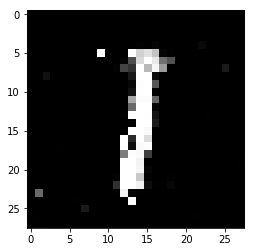

Number batches 78
21(0/78) D: 0.2274, G: 2.4823
21(1/78) D: 0.1415, G: 3.3824
21(2/78) D: 0.2316, G: 2.2189
21(3/78) D: 0.1971, G: 2.4240
21(4/78) D: 0.1231, G: 3.4536
21(5/78) D: 0.1664, G: 2.8519
21(6/78) D: 0.1080, G: 2.5694
21(7/78) D: 0.1392, G: 2.9832
21(8/78) D: 0.1473, G: 2.6042
21(9/78) D: 0.1180, G: 2.8356
21(10/78) D: 0.0960, G: 3.6482
21(11/78) D: 0.1347, G: 3.2173
21(12/78) D: 0.1596, G: 2.3565
21(13/78) D: 0.1788, G: 2.6291
21(14/78) D: 0.1417, G: 3.9411
21(15/78) D: 0.1508, G: 3.5012
21(16/78) D: 0.1645, G: 2.2978
21(17/78) D: 0.1515, G: 2.8766
21(18/78) D: 0.1395, G: 2.9329
21(19/78) D: 0.1070, G: 3.0110
21(20/78) D: 0.1532, G: 2.4182
21(21/78) D: 0.1703, G: 3.2056
21(22/78) D: 0.1668, G: 2.5867
21(23/78) D: 0.1089, G: 3.8706
21(24/78) D: 0.1541, G: 3.3054
21(25/78) D: 0.1270, G: 2.7631
21(26/78) D: 0.1479, G: 2.1315
21(27/78) D: 0.1790, G: 3.8250
21(28/78) D: 0.1460, G: 3.7052
21(29/78) D: 0.1280, G: 2.3830
21(30/78) D: 0.1423, G: 2.6378
21(31/78) D: 0.1406, G: 3.0358


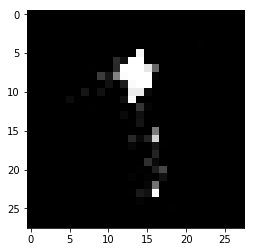

Number batches 78
22(0/78) D: 0.2151, G: 4.8405
22(1/78) D: 0.1467, G: 4.1776
22(2/78) D: 0.2059, G: 2.3989
22(3/78) D: 0.1952, G: 3.0624
22(4/78) D: 0.1217, G: 2.9045
22(5/78) D: 0.1384, G: 2.7748
22(6/78) D: 0.1211, G: 2.7134
22(7/78) D: 0.1353, G: 3.3868
22(8/78) D: 0.1581, G: 2.8084
22(9/78) D: 0.1163, G: 3.1916
22(10/78) D: 0.0643, G: 4.0956
22(11/78) D: 0.1418, G: 3.1247
22(12/78) D: 0.1608, G: 2.2341
22(13/78) D: 0.1989, G: 4.0732
22(14/78) D: 0.1436, G: 3.2841
22(15/78) D: 0.1208, G: 2.6288
22(16/78) D: 0.1745, G: 2.8573
22(17/78) D: 0.1554, G: 3.1253
22(18/78) D: 0.1891, G: 2.5402
22(19/78) D: 0.1392, G: 3.0757
22(20/78) D: 0.1633, G: 3.1200
22(21/78) D: 0.2001, G: 2.5412
22(22/78) D: 0.1705, G: 3.9134
22(23/78) D: 0.1350, G: 3.2937
22(24/78) D: 0.1850, G: 2.3729
22(25/78) D: 0.1250, G: 3.9692
22(26/78) D: 0.2294, G: 2.9287
22(27/78) D: 0.1715, G: 2.0102
22(28/78) D: 0.1888, G: 4.3651
22(29/78) D: 0.2806, G: 3.5126
22(30/78) D: 0.1619, G: 1.9195
22(31/78) D: 0.1892, G: 2.9961


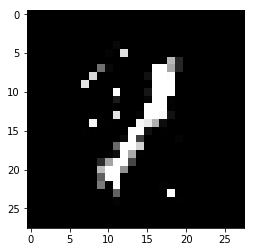

Number batches 78
23(0/78) D: 0.2980, G: 4.8608
23(1/78) D: 0.2656, G: 3.4619
23(2/78) D: 0.2096, G: 1.5792
23(3/78) D: 0.3026, G: 4.0567
23(4/78) D: 0.2133, G: 3.4343
23(5/78) D: 0.1270, G: 2.4556
23(6/78) D: 0.1220, G: 2.7519
23(7/78) D: 0.1140, G: 3.0758
23(8/78) D: 0.1703, G: 2.6963
23(9/78) D: 0.1373, G: 2.9372
23(10/78) D: 0.0701, G: 3.7017
23(11/78) D: 0.1415, G: 3.3413
23(12/78) D: 0.1275, G: 2.2530
23(13/78) D: 0.1590, G: 2.7022
23(14/78) D: 0.1394, G: 3.4806
23(15/78) D: 0.1081, G: 3.4999
23(16/78) D: 0.1351, G: 2.4705
23(17/78) D: 0.1365, G: 3.1646
23(18/78) D: 0.1355, G: 3.4233
23(19/78) D: 0.1344, G: 2.6262
23(20/78) D: 0.1422, G: 3.6736
23(21/78) D: 0.1665, G: 2.2848
23(22/78) D: 0.1287, G: 4.0611
23(23/78) D: 0.1412, G: 3.6693
23(24/78) D: 0.1270, G: 2.1942
23(25/78) D: 0.1320, G: 4.5955
23(26/78) D: 0.2797, G: 2.9481
23(27/78) D: 0.1814, G: 1.9546
23(28/78) D: 0.1750, G: 4.4774
23(29/78) D: 0.2314, G: 3.3956
23(30/78) D: 0.1613, G: 1.8101
23(31/78) D: 0.1593, G: 3.9329


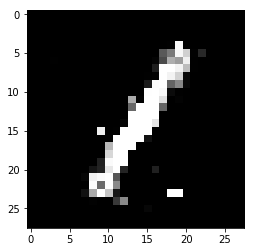

Number batches 78
24(0/78) D: 0.1231, G: 3.6371
24(1/78) D: 0.0929, G: 3.5232
24(2/78) D: 0.0869, G: 3.1273
24(3/78) D: 0.1267, G: 2.7932
24(4/78) D: 0.1087, G: 4.5778
24(5/78) D: 0.0946, G: 4.0739
24(6/78) D: 0.0743, G: 3.2885
24(7/78) D: 0.0864, G: 3.6515
24(8/78) D: 0.1287, G: 2.7000
24(9/78) D: 0.1106, G: 5.1402
24(10/78) D: 0.0733, G: 4.8091
24(11/78) D: 0.1346, G: 2.4935
24(12/78) D: 0.1680, G: 5.4849
24(13/78) D: 0.2710, G: 2.7085
24(14/78) D: 0.1039, G: 2.8863
24(15/78) D: 0.0889, G: 4.2685
24(16/78) D: 0.1352, G: 2.7013
24(17/78) D: 0.1077, G: 3.6374
24(18/78) D: 0.1231, G: 3.8926
24(19/78) D: 0.1082, G: 2.6707
24(20/78) D: 0.1539, G: 4.8576
24(21/78) D: 0.2818, G: 2.5253
24(22/78) D: 0.2212, G: 4.0702
24(23/78) D: 0.1283, G: 3.3989
24(24/78) D: 0.1420, G: 2.4294
24(25/78) D: 0.1878, G: 3.7351
24(26/78) D: 0.2509, G: 1.9451
24(27/78) D: 0.2438, G: 3.8005
24(28/78) D: 0.1913, G: 3.1097
24(29/78) D: 0.1659, G: 2.5907
24(30/78) D: 0.1645, G: 2.9993
24(31/78) D: 0.1463, G: 3.4141


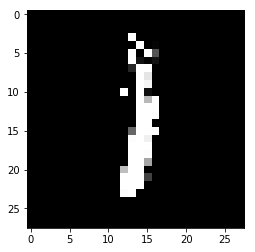

Number batches 78
25(0/78) D: 0.1806, G: 1.8927
25(1/78) D: 0.1575, G: 4.2836
25(2/78) D: 0.2340, G: 3.0891
25(3/78) D: 0.1844, G: 1.9694
25(4/78) D: 0.2110, G: 4.3319
25(5/78) D: 0.2225, G: 3.5935
25(6/78) D: 0.1089, G: 2.1161
25(7/78) D: 0.1549, G: 3.5816
25(8/78) D: 0.1731, G: 2.9901
25(9/78) D: 0.1154, G: 3.5273
25(10/78) D: 0.0692, G: 3.8282
25(11/78) D: 0.1489, G: 2.6039
25(12/78) D: 0.1252, G: 2.1518
25(13/78) D: 0.1676, G: 3.7358
25(14/78) D: 0.1476, G: 3.3038
25(15/78) D: 0.1289, G: 2.9401
25(16/78) D: 0.2060, G: 3.3282
25(17/78) D: 0.1383, G: 2.8023
25(18/78) D: 0.1604, G: 3.2800
25(19/78) D: 0.1414, G: 2.9207
25(20/78) D: 0.1628, G: 3.4487
25(21/78) D: 0.1733, G: 2.1734
25(22/78) D: 0.1717, G: 4.0291
25(23/78) D: 0.1535, G: 3.2873
25(24/78) D: 0.1571, G: 2.3929
25(25/78) D: 0.1339, G: 3.1661
25(26/78) D: 0.1774, G: 2.6091
25(27/78) D: 0.1523, G: 3.7020
25(28/78) D: 0.1229, G: 2.9770
25(29/78) D: 0.1301, G: 3.1176
25(30/78) D: 0.1222, G: 2.9457
25(31/78) D: 0.1032, G: 3.8947


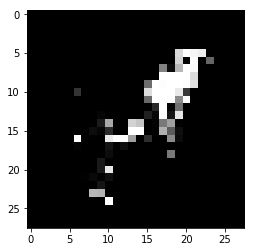

Number batches 78
26(0/78) D: 0.2776, G: 4.4804
26(1/78) D: 0.2318, G: 3.7533
26(2/78) D: 0.2169, G: 1.6125
26(3/78) D: 0.2597, G: 2.6364
26(4/78) D: 0.1762, G: 2.6604
26(5/78) D: 0.1661, G: 3.1648
26(6/78) D: 0.1908, G: 2.1771
26(7/78) D: 0.1735, G: 2.9803
26(8/78) D: 0.1646, G: 2.3153
26(9/78) D: 0.1428, G: 3.1349
26(10/78) D: 0.0722, G: 4.0574
26(11/78) D: 0.1782, G: 3.2510
26(12/78) D: 0.1725, G: 1.8914
26(13/78) D: 0.2260, G: 4.5708
26(14/78) D: 0.2264, G: 3.8484
26(15/78) D: 0.1694, G: 2.4193
26(16/78) D: 0.1840, G: 2.5280
26(17/78) D: 0.1358, G: 3.0637
26(18/78) D: 0.1446, G: 2.9418
26(19/78) D: 0.1229, G: 2.6843
26(20/78) D: 0.1501, G: 2.5921
26(21/78) D: 0.1840, G: 2.7924
26(22/78) D: 0.1666, G: 2.8201
26(23/78) D: 0.1439, G: 3.1467
26(24/78) D: 0.1490, G: 2.3783
26(25/78) D: 0.1564, G: 3.4572
26(26/78) D: 0.2101, G: 2.4123
26(27/78) D: 0.1627, G: 3.3362
26(28/78) D: 0.1277, G: 3.2668
26(29/78) D: 0.1829, G: 2.2467
26(30/78) D: 0.1715, G: 3.3929
26(31/78) D: 0.1320, G: 3.3883


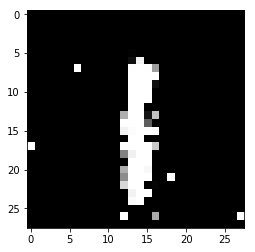

Number batches 78
27(0/78) D: 0.2426, G: 2.8310
27(1/78) D: 0.1412, G: 3.1396
27(2/78) D: 0.1331, G: 2.7503
27(3/78) D: 0.1539, G: 2.5931
27(4/78) D: 0.1699, G: 3.0852
27(5/78) D: 0.1279, G: 3.1096
27(6/78) D: 0.1211, G: 2.7732
27(7/78) D: 0.1495, G: 3.4217
27(8/78) D: 0.1641, G: 2.4453
27(9/78) D: 0.1664, G: 4.5055
27(10/78) D: 0.0892, G: 4.6865
27(11/78) D: 0.2047, G: 2.8533
27(12/78) D: 0.1290, G: 2.4691
27(13/78) D: 0.1479, G: 3.2997
27(14/78) D: 0.1516, G: 3.5273
27(15/78) D: 0.1036, G: 2.9669
27(16/78) D: 0.1285, G: 2.7333
27(17/78) D: 0.1142, G: 3.2085
27(18/78) D: 0.1249, G: 3.2961
27(19/78) D: 0.1170, G: 3.0788
27(20/78) D: 0.1288, G: 2.6512
27(21/78) D: 0.1828, G: 3.3859
27(22/78) D: 0.1088, G: 3.3827
27(23/78) D: 0.0979, G: 3.2257
27(24/78) D: 0.1196, G: 3.2320
27(25/78) D: 0.1038, G: 3.4530
27(26/78) D: 0.1394, G: 3.1257
27(27/78) D: 0.1077, G: 3.5926
27(28/78) D: 0.0788, G: 3.7519
27(29/78) D: 0.1050, G: 2.2787
27(30/78) D: 0.1712, G: 7.1286
27(31/78) D: 0.3124, G: 5.3998


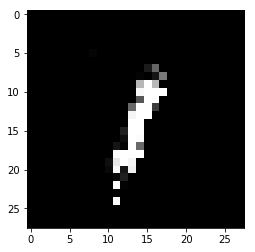

Number batches 78
28(0/78) D: 0.2217, G: 2.1459
28(1/78) D: 0.1676, G: 4.1841
28(2/78) D: 0.2349, G: 3.3569
28(3/78) D: 0.1936, G: 1.9766
28(4/78) D: 0.1641, G: 3.5324
28(5/78) D: 0.1385, G: 3.5406
28(6/78) D: 0.1491, G: 2.3978
28(7/78) D: 0.1291, G: 3.1859
28(8/78) D: 0.1757, G: 2.8050
28(9/78) D: 0.1166, G: 2.8376
28(10/78) D: 0.0826, G: 4.0940
28(11/78) D: 0.1874, G: 3.1723
28(12/78) D: 0.1288, G: 2.6523
28(13/78) D: 0.2039, G: 3.6553
28(14/78) D: 0.1394, G: 3.6742
28(15/78) D: 0.1550, G: 2.4851
28(16/78) D: 0.1646, G: 3.3380
28(17/78) D: 0.1344, G: 3.7977
28(18/78) D: 0.1781, G: 2.2334
28(19/78) D: 0.1861, G: 4.1401
28(20/78) D: 0.1804, G: 3.6531
28(21/78) D: 0.2524, G: 1.4466
28(22/78) D: 0.2918, G: 5.0689
28(23/78) D: 0.2591, G: 4.5495
28(24/78) D: 0.2276, G: 3.1306
28(25/78) D: 0.1725, G: 2.9587
28(26/78) D: 0.2360, G: 2.4452
28(27/78) D: 0.2136, G: 2.7021
28(28/78) D: 0.1407, G: 3.0043
28(29/78) D: 0.1989, G: 2.3424
28(30/78) D: 0.1796, G: 2.5797
28(31/78) D: 0.1499, G: 3.0214


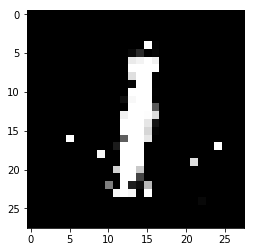

Number batches 78
29(0/78) D: 0.2036, G: 2.4225
29(1/78) D: 0.1569, G: 3.3035
29(2/78) D: 0.1654, G: 3.1995
29(3/78) D: 0.1921, G: 2.1227
29(4/78) D: 0.1460, G: 3.0118
29(5/78) D: 0.1316, G: 3.5215
29(6/78) D: 0.1215, G: 2.9550
29(7/78) D: 0.1343, G: 2.4627
29(8/78) D: 0.2268, G: 3.3172
29(9/78) D: 0.1417, G: 3.0959
29(10/78) D: 0.1065, G: 3.8863
29(11/78) D: 0.2025, G: 2.4489
29(12/78) D: 0.1497, G: 3.0901
29(13/78) D: 0.1631, G: 2.9980
29(14/78) D: 0.1452, G: 3.3282
29(15/78) D: 0.1490, G: 2.3338
29(16/78) D: 0.1831, G: 2.8912
29(17/78) D: 0.1375, G: 3.3928
29(18/78) D: 0.1864, G: 2.3540
29(19/78) D: 0.2137, G: 4.2932
29(20/78) D: 0.2207, G: 3.4003
29(21/78) D: 0.2420, G: 1.2725
29(22/78) D: 0.3761, G: 5.4411
29(23/78) D: 0.3376, G: 4.4252
29(24/78) D: 0.2258, G: 3.1131
29(25/78) D: 0.1105, G: 2.6173
29(26/78) D: 0.2602, G: 3.1057
29(27/78) D: 0.1828, G: 2.7880
29(28/78) D: 0.1274, G: 2.6053
29(29/78) D: 0.2057, G: 2.5687
29(30/78) D: 0.1527, G: 2.5148
29(31/78) D: 0.1675, G: 2.9905


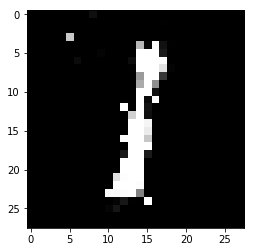

Number batches 78
30(0/78) D: 0.2038, G: 2.3749
30(1/78) D: 0.2006, G: 3.1182
30(2/78) D: 0.1844, G: 2.5263
30(3/78) D: 0.2063, G: 2.1543
30(4/78) D: 0.2145, G: 3.3062
30(5/78) D: 0.1793, G: 2.8648
30(6/78) D: 0.1436, G: 2.3308
30(7/78) D: 0.1633, G: 3.2863
30(8/78) D: 0.2163, G: 2.5111
30(9/78) D: 0.1614, G: 2.2635
30(10/78) D: 0.1314, G: 3.9555
30(11/78) D: 0.2281, G: 2.7812
30(12/78) D: 0.1237, G: 2.4874
30(13/78) D: 0.2112, G: 3.2400
30(14/78) D: 0.1651, G: 3.7143
30(15/78) D: 0.1773, G: 2.4170
30(16/78) D: 0.2229, G: 2.4890
30(17/78) D: 0.1444, G: 3.3914
30(18/78) D: 0.2135, G: 2.3050
30(19/78) D: 0.1359, G: 2.7316
30(20/78) D: 0.2010, G: 3.3713
30(21/78) D: 0.1785, G: 2.4103
30(22/78) D: 0.1818, G: 2.6048
30(23/78) D: 0.1492, G: 3.1589
30(24/78) D: 0.1613, G: 2.8604
30(25/78) D: 0.1077, G: 3.1442
30(26/78) D: 0.1848, G: 1.6428
30(27/78) D: 0.2658, G: 6.1201
30(28/78) D: 0.3515, G: 4.0048
30(29/78) D: 0.2344, G: 1.8591
30(30/78) D: 0.2647, G: 3.0468
30(31/78) D: 0.1443, G: 3.1058


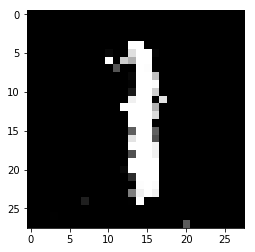

Number batches 78
31(0/78) D: 0.4700, G: 3.6610
31(1/78) D: 0.2595, G: 2.2918
31(2/78) D: 0.2141, G: 1.9683
31(3/78) D: 0.2605, G: 2.2057
31(4/78) D: 0.2132, G: 2.6484
31(5/78) D: 0.2051, G: 2.6613
31(6/78) D: 0.1587, G: 2.6396
31(7/78) D: 0.1512, G: 2.4145
31(8/78) D: 0.2140, G: 2.2316
31(9/78) D: 0.1649, G: 2.4939
31(10/78) D: 0.1305, G: 3.0777
31(11/78) D: 0.1831, G: 2.8613
31(12/78) D: 0.1605, G: 2.4562
31(13/78) D: 0.1773, G: 2.4467
31(14/78) D: 0.1661, G: 2.7571
31(15/78) D: 0.1721, G: 2.9478
31(16/78) D: 0.1220, G: 2.7815
31(17/78) D: 0.1449, G: 3.1371
31(18/78) D: 0.1958, G: 2.6502
31(19/78) D: 0.1663, G: 2.9310
31(20/78) D: 0.1283, G: 2.7111
31(21/78) D: 0.1680, G: 2.5027
31(22/78) D: 0.1652, G: 2.8672
31(23/78) D: 0.1493, G: 3.1721
31(24/78) D: 0.1614, G: 2.8618
31(25/78) D: 0.1372, G: 3.2155
31(26/78) D: 0.1545, G: 2.5465
31(27/78) D: 0.1654, G: 3.6854
31(28/78) D: 0.1299, G: 3.2597
31(29/78) D: 0.1689, G: 2.2921
31(30/78) D: 0.2279, G: 4.8252
31(31/78) D: 0.2743, G: 3.0068


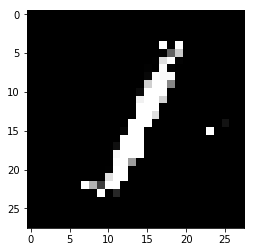

Number batches 78
32(0/78) D: 0.2202, G: 2.0627
32(1/78) D: 0.1928, G: 3.6324
32(2/78) D: 0.2306, G: 2.4196
32(3/78) D: 0.2251, G: 1.4904
32(4/78) D: 0.2369, G: 4.4299
32(5/78) D: 0.2879, G: 3.1624
32(6/78) D: 0.1856, G: 2.3493
32(7/78) D: 0.2107, G: 2.8275
32(8/78) D: 0.2379, G: 2.1700
32(9/78) D: 0.2286, G: 2.9771
32(10/78) D: 0.1753, G: 3.1353
32(11/78) D: 0.1988, G: 2.6255
32(12/78) D: 0.1693, G: 2.7083
32(13/78) D: 0.1738, G: 3.0805
32(14/78) D: 0.1827, G: 2.5812
32(15/78) D: 0.1865, G: 2.6648
32(16/78) D: 0.1803, G: 2.8256
32(17/78) D: 0.1475, G: 3.2099
32(18/78) D: 0.2254, G: 2.3663
32(19/78) D: 0.1795, G: 3.1401
32(20/78) D: 0.1739, G: 2.9397
32(21/78) D: 0.2481, G: 1.9857
32(22/78) D: 0.2281, G: 3.6008
32(23/78) D: 0.2095, G: 2.8019
32(24/78) D: 0.2014, G: 2.3493
32(25/78) D: 0.1609, G: 3.0379
32(26/78) D: 0.2704, G: 2.0503
32(27/78) D: 0.2157, G: 3.2016
32(28/78) D: 0.1425, G: 3.0093
32(29/78) D: 0.2099, G: 2.2689
32(30/78) D: 0.1884, G: 2.6804
32(31/78) D: 0.1730, G: 2.9457


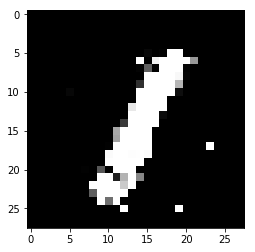

Number batches 78
33(0/78) D: 0.2032, G: 2.2466
33(1/78) D: 0.2081, G: 3.3688
33(2/78) D: 0.2161, G: 2.8121
33(3/78) D: 0.2134, G: 2.2843
33(4/78) D: 0.1598, G: 3.3200
33(5/78) D: 0.1587, G: 2.4908
33(6/78) D: 0.1994, G: 3.2840
33(7/78) D: 0.1869, G: 3.2071
33(8/78) D: 0.1815, G: 2.6897
33(9/78) D: 0.2252, G: 2.9081
33(10/78) D: 0.1573, G: 2.6988
33(11/78) D: 0.1928, G: 2.8699
33(12/78) D: 0.1464, G: 3.1968
33(13/78) D: 0.2017, G: 2.2432
33(14/78) D: 0.1795, G: 3.8009
33(15/78) D: 0.1934, G: 2.7966
33(16/78) D: 0.2125, G: 2.2844
33(17/78) D: 0.1870, G: 3.9198
33(18/78) D: 0.2647, G: 2.7472
33(19/78) D: 0.1435, G: 2.3424
33(20/78) D: 0.2064, G: 3.1892
33(21/78) D: 0.2411, G: 2.4712
33(22/78) D: 0.2045, G: 1.8762
33(23/78) D: 0.2063, G: 4.3533
33(24/78) D: 0.2977, G: 2.8666
33(25/78) D: 0.1684, G: 2.2861
33(26/78) D: 0.2539, G: 2.9198
33(27/78) D: 0.2256, G: 2.1733
33(28/78) D: 0.1469, G: 2.9357
33(29/78) D: 0.1791, G: 2.9217
33(30/78) D: 0.1918, G: 2.4044
33(31/78) D: 0.1506, G: 2.9565


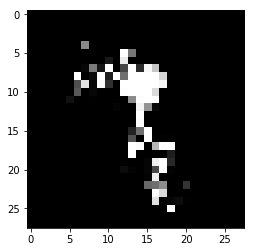

Number batches 78
34(0/78) D: 0.2110, G: 2.1761
34(1/78) D: 0.1843, G: 2.5872
34(2/78) D: 0.1962, G: 2.8483
34(3/78) D: 0.2432, G: 1.6096
34(4/78) D: 0.2661, G: 4.0443
34(5/78) D: 0.2366, G: 3.0946
34(6/78) D: 0.1569, G: 2.3625
34(7/78) D: 0.1608, G: 2.7268
34(8/78) D: 0.2364, G: 2.1896
34(9/78) D: 0.2214, G: 2.8638
34(10/78) D: 0.1463, G: 3.1901
34(11/78) D: 0.1956, G: 2.8870
34(12/78) D: 0.1958, G: 2.3003
34(13/78) D: 0.1997, G: 2.3212
34(14/78) D: 0.1751, G: 2.8327
34(15/78) D: 0.1551, G: 2.9404
34(16/78) D: 0.2058, G: 2.7581
34(17/78) D: 0.1875, G: 2.8580
34(18/78) D: 0.1873, G: 2.1739
34(19/78) D: 0.1815, G: 3.5604
34(20/78) D: 0.2236, G: 2.2098
34(21/78) D: 0.2384, G: 2.2132
34(22/78) D: 0.2384, G: 2.4710
34(23/78) D: 0.2097, G: 2.9509
34(24/78) D: 0.2153, G: 2.0762
34(25/78) D: 0.1506, G: 2.6369
34(26/78) D: 0.2227, G: 2.8077
34(27/78) D: 0.2398, G: 1.9569
34(28/78) D: 0.1867, G: 3.1646
34(29/78) D: 0.2200, G: 2.3056
34(30/78) D: 0.2613, G: 2.9757
34(31/78) D: 0.1731, G: 2.4283


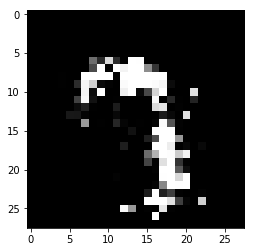

Number batches 78
35(0/78) D: 0.2308, G: 2.0863
35(1/78) D: 0.2046, G: 2.6301
35(2/78) D: 0.2064, G: 2.7077
35(3/78) D: 0.2935, G: 2.0232
35(4/78) D: 0.2191, G: 2.3469
35(5/78) D: 0.1958, G: 2.5524
35(6/78) D: 0.2051, G: 2.4228
35(7/78) D: 0.2073, G: 2.7216
35(8/78) D: 0.2465, G: 2.2725
35(9/78) D: 0.2572, G: 2.7050
35(10/78) D: 0.1712, G: 2.9491
35(11/78) D: 0.2246, G: 2.9838
35(12/78) D: 0.2051, G: 2.0640
35(13/78) D: 0.2253, G: 2.9209
35(14/78) D: 0.1560, G: 3.1592
35(15/78) D: 0.1998, G: 2.9864
35(16/78) D: 0.2357, G: 1.9411
35(17/78) D: 0.1877, G: 3.6615
35(18/78) D: 0.2619, G: 2.3738
35(19/78) D: 0.1807, G: 2.4330
35(20/78) D: 0.2013, G: 2.9242
35(21/78) D: 0.2260, G: 1.7786
35(22/78) D: 0.2543, G: 3.3723
35(23/78) D: 0.2297, G: 2.2668
35(24/78) D: 0.1953, G: 2.3093
35(25/78) D: 0.1977, G: 2.9220
35(26/78) D: 0.2747, G: 2.4035
35(27/78) D: 0.2410, G: 1.9647
35(28/78) D: 0.2346, G: 2.8921
35(29/78) D: 0.2548, G: 2.4105
35(30/78) D: 0.2217, G: 2.2399
35(31/78) D: 0.2167, G: 2.5664


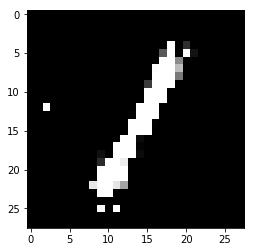

Number batches 78
36(0/78) D: 0.2548, G: 3.0028
36(1/78) D: 0.2381, G: 2.5907
36(2/78) D: 0.2510, G: 1.9634
36(3/78) D: 0.2470, G: 2.6963
36(4/78) D: 0.2393, G: 1.8667
36(5/78) D: 0.2583, G: 3.8906
36(6/78) D: 0.2837, G: 2.3029
36(7/78) D: 0.1881, G: 2.4535
36(8/78) D: 0.2365, G: 2.8104
36(9/78) D: 0.2103, G: 2.5544
36(10/78) D: 0.1416, G: 2.7645
36(11/78) D: 0.2082, G: 2.6830
36(12/78) D: 0.2161, G: 3.0320
36(13/78) D: 0.2025, G: 2.0446
36(14/78) D: 0.1723, G: 2.9558
36(15/78) D: 0.1975, G: 2.3732
36(16/78) D: 0.2522, G: 3.1631
36(17/78) D: 0.1739, G: 2.7567
36(18/78) D: 0.2208, G: 2.2990
36(19/78) D: 0.2055, G: 2.9947
36(20/78) D: 0.2064, G: 2.4948
36(21/78) D: 0.2420, G: 2.1767
36(22/78) D: 0.2237, G: 2.3672
36(23/78) D: 0.1919, G: 2.7868
36(24/78) D: 0.1996, G: 2.4299
36(25/78) D: 0.1995, G: 2.2300
36(26/78) D: 0.2552, G: 2.5724
36(27/78) D: 0.2663, G: 2.6473
36(28/78) D: 0.1971, G: 2.1640
36(29/78) D: 0.2258, G: 3.4019
36(30/78) D: 0.2725, G: 1.9959
36(31/78) D: 0.2251, G: 3.2571


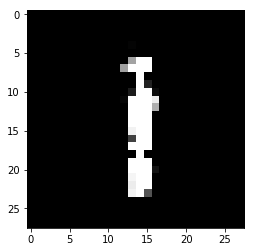

Number batches 78
37(0/78) D: 0.2531, G: 2.1723
37(1/78) D: 0.2145, G: 2.4692
37(2/78) D: 0.2096, G: 2.4236
37(3/78) D: 0.2557, G: 2.0950
37(4/78) D: 0.2017, G: 2.7799
37(5/78) D: 0.1696, G: 2.9637
37(6/78) D: 0.1643, G: 2.1387
37(7/78) D: 0.1419, G: 2.6474
37(8/78) D: 0.2083, G: 2.2621
37(9/78) D: 0.1797, G: 2.7062
37(10/78) D: 0.1179, G: 3.1422
37(11/78) D: 0.1994, G: 2.7427
37(12/78) D: 0.1958, G: 2.5077
37(13/78) D: 0.2501, G: 2.0796
37(14/78) D: 0.2103, G: 3.3031
37(15/78) D: 0.2569, G: 2.1396
37(16/78) D: 0.2467, G: 2.2216
37(17/78) D: 0.1914, G: 3.1729
37(18/78) D: 0.2109, G: 2.9258
37(19/78) D: 0.1799, G: 1.9029
37(20/78) D: 0.2192, G: 2.6961
37(21/78) D: 0.2605, G: 1.8397
37(22/78) D: 0.2407, G: 3.1235
37(23/78) D: 0.1866, G: 2.6566
37(24/78) D: 0.1844, G: 1.8828
37(25/78) D: 0.2230, G: 2.8837
37(26/78) D: 0.2666, G: 2.0832
37(27/78) D: 0.2729, G: 2.6311
37(28/78) D: 0.1620, G: 2.7500
37(29/78) D: 0.2248, G: 1.9562
37(30/78) D: 0.1987, G: 2.1909
37(31/78) D: 0.1780, G: 3.3638


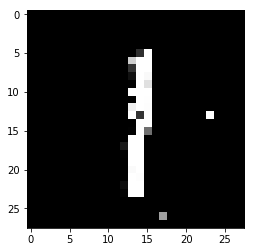

Number batches 78
38(0/78) D: 0.2287, G: 2.3507
38(1/78) D: 0.1877, G: 2.7054
38(2/78) D: 0.2493, G: 2.2024
38(3/78) D: 0.2523, G: 2.4834
38(4/78) D: 0.2360, G: 3.1793
38(5/78) D: 0.2024, G: 2.2570
38(6/78) D: 0.2359, G: 3.3602
38(7/78) D: 0.2299, G: 2.4578
38(8/78) D: 0.2327, G: 1.5140
38(9/78) D: 0.3496, G: 5.3471
38(10/78) D: 0.4908, G: 2.5577
38(11/78) D: 0.2220, G: 1.9481
38(12/78) D: 0.3551, G: 3.3294
38(13/78) D: 0.2742, G: 2.8660
38(14/78) D: 0.2155, G: 1.9983
38(15/78) D: 0.2351, G: 2.1445
38(16/78) D: 0.2237, G: 2.5147
38(17/78) D: 0.1798, G: 2.6191
38(18/78) D: 0.2322, G: 2.1123
38(19/78) D: 0.1956, G: 2.0699
38(20/78) D: 0.2092, G: 2.6141
38(21/78) D: 0.2667, G: 2.3363
38(22/78) D: 0.2358, G: 2.0704
38(23/78) D: 0.2050, G: 2.6565
38(24/78) D: 0.2081, G: 2.6428
38(25/78) D: 0.1659, G: 2.5157
38(26/78) D: 0.2164, G: 1.8764
38(27/78) D: 0.2352, G: 3.0523
38(28/78) D: 0.2130, G: 2.6290
38(29/78) D: 0.2161, G: 1.6854
38(30/78) D: 0.2603, G: 3.9921
38(31/78) D: 0.2966, G: 2.3168


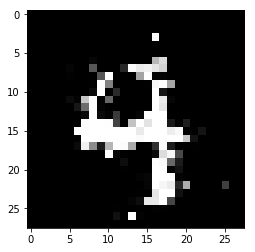

Number batches 78
39(0/78) D: 0.2894, G: 3.2703
39(1/78) D: 0.3054, G: 2.4453
39(2/78) D: 0.2471, G: 1.6601
39(3/78) D: 0.3872, G: 3.1806
39(4/78) D: 0.2563, G: 2.5558
39(5/78) D: 0.2005, G: 1.7928
39(6/78) D: 0.2057, G: 2.9659
39(7/78) D: 0.2192, G: 2.6715
39(8/78) D: 0.2500, G: 2.2909
39(9/78) D: 0.3184, G: 2.3447
39(10/78) D: 0.2123, G: 2.9063
39(11/78) D: 0.2370, G: 2.9189
39(12/78) D: 0.2368, G: 1.8723
39(13/78) D: 0.2350, G: 2.6508
39(14/78) D: 0.2252, G: 3.0087
39(15/78) D: 0.2362, G: 2.4198
39(16/78) D: 0.2359, G: 2.0332
39(17/78) D: 0.2223, G: 3.0319
39(18/78) D: 0.2639, G: 2.1545
39(19/78) D: 0.2200, G: 2.2002
39(20/78) D: 0.2329, G: 2.8590
39(21/78) D: 0.2627, G: 1.9754
39(22/78) D: 0.2531, G: 2.4757
39(23/78) D: 0.2029, G: 2.4075
39(24/78) D: 0.2456, G: 2.0635
39(25/78) D: 0.2254, G: 2.9862
39(26/78) D: 0.2718, G: 1.9808
39(27/78) D: 0.2194, G: 2.4591
39(28/78) D: 0.1993, G: 3.2141
39(29/78) D: 0.2888, G: 2.4520
39(30/78) D: 0.2944, G: 2.0248
39(31/78) D: 0.2710, G: 2.8049


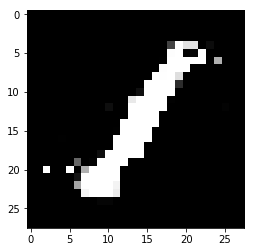

Number batches 78
40(0/78) D: 0.2967, G: 2.3727
40(1/78) D: 0.2214, G: 2.3096
40(2/78) D: 0.2440, G: 2.3063
40(3/78) D: 0.2630, G: 2.1943
40(4/78) D: 0.2150, G: 2.9951
40(5/78) D: 0.2522, G: 2.3048
40(6/78) D: 0.1946, G: 2.6127
40(7/78) D: 0.2109, G: 2.8452
40(8/78) D: 0.2582, G: 1.8870
40(9/78) D: 0.2755, G: 2.9002
40(10/78) D: 0.2017, G: 2.2247
40(11/78) D: 0.2745, G: 3.2826
40(12/78) D: 0.2640, G: 2.0968
40(13/78) D: 0.2945, G: 3.1721
40(14/78) D: 0.2553, G: 2.2066
40(15/78) D: 0.2231, G: 2.2499
40(16/78) D: 0.2267, G: 2.6566
40(17/78) D: 0.2100, G: 2.6159
40(18/78) D: 0.2853, G: 2.0022
40(19/78) D: 0.2484, G: 2.6429
40(20/78) D: 0.2388, G: 2.3845
40(21/78) D: 0.2764, G: 2.0376
40(22/78) D: 0.2421, G: 2.0820
40(23/78) D: 0.2122, G: 2.4922
40(24/78) D: 0.2298, G: 1.9853
40(25/78) D: 0.2664, G: 3.0920
40(26/78) D: 0.3456, G: 1.8130
40(27/78) D: 0.2482, G: 2.0258
40(28/78) D: 0.2241, G: 2.6714
40(29/78) D: 0.2838, G: 1.4932
40(30/78) D: 0.3607, G: 2.8708
40(31/78) D: 0.2551, G: 2.5291


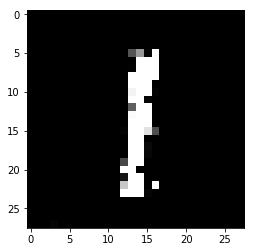

Number batches 78
41(0/78) D: 0.4335, G: 0.8418
41(1/78) D: 0.5832, G: 4.6878
41(2/78) D: 0.9184, G: 1.9849
41(3/78) D: 0.3414, G: 1.2908
41(4/78) D: 0.3694, G: 1.8434
41(5/78) D: 0.2484, G: 2.2689
41(6/78) D: 0.2396, G: 2.3712
41(7/78) D: 0.2250, G: 2.0094
41(8/78) D: 0.2847, G: 1.7742
41(9/78) D: 0.2572, G: 2.1403
41(10/78) D: 0.1923, G: 2.4198
41(11/78) D: 0.2589, G: 2.1539
41(12/78) D: 0.2287, G: 2.0105
41(13/78) D: 0.2502, G: 2.1821
41(14/78) D: 0.2055, G: 2.0521
41(15/78) D: 0.2256, G: 2.3712
41(16/78) D: 0.2592, G: 2.5177
41(17/78) D: 0.1908, G: 2.2596
41(18/78) D: 0.2104, G: 2.5593
41(19/78) D: 0.2183, G: 2.5234
41(20/78) D: 0.2571, G: 2.2840
41(21/78) D: 0.2267, G: 2.2541
41(22/78) D: 0.2541, G: 2.4269
41(23/78) D: 0.2493, G: 2.3122
41(24/78) D: 0.2772, G: 1.8606
41(25/78) D: 0.3321, G: 3.5010
41(26/78) D: 0.3805, G: 1.0894
41(27/78) D: 0.5183, G: 4.1800
41(28/78) D: 0.4624, G: 2.4576
41(29/78) D: 0.2905, G: 1.4416
41(30/78) D: 0.3828, G: 1.9988
41(31/78) D: 0.3413, G: 2.4064


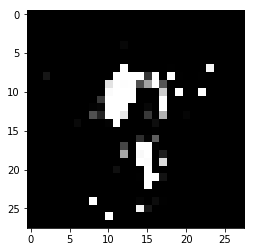

Number batches 78
42(0/78) D: 0.2722, G: 1.7295
42(1/78) D: 0.2675, G: 3.0532
42(2/78) D: 0.2710, G: 1.7925
42(3/78) D: 0.2469, G: 1.8856
42(4/78) D: 0.2463, G: 2.7411
42(5/78) D: 0.2333, G: 2.1962
42(6/78) D: 0.2172, G: 2.3830
42(7/78) D: 0.1709, G: 2.4029
42(8/78) D: 0.1982, G: 2.3407
42(9/78) D: 0.1998, G: 2.7098
42(10/78) D: 0.1627, G: 2.7745
42(11/78) D: 0.2411, G: 1.4601
42(12/78) D: 0.2872, G: 4.8918
42(13/78) D: 0.3978, G: 3.0412
42(14/78) D: 0.2724, G: 2.1480
42(15/78) D: 0.1944, G: 2.5995
42(16/78) D: 0.2397, G: 2.3328
42(17/78) D: 0.1352, G: 2.3730
42(18/78) D: 0.2729, G: 2.0432
42(19/78) D: 0.2218, G: 3.0885
42(20/78) D: 0.2408, G: 2.2189
42(21/78) D: 0.2481, G: 2.2516
42(22/78) D: 0.2379, G: 2.6177
42(23/78) D: 0.1858, G: 2.2162
42(24/78) D: 0.2154, G: 2.1857
42(25/78) D: 0.2211, G: 2.5299
42(26/78) D: 0.2886, G: 2.1249
42(27/78) D: 0.3443, G: 3.3905
42(28/78) D: 0.2635, G: 1.9395
42(29/78) D: 0.2672, G: 2.6319
42(30/78) D: 0.3066, G: 1.6231
42(31/78) D: 0.3198, G: 2.6455


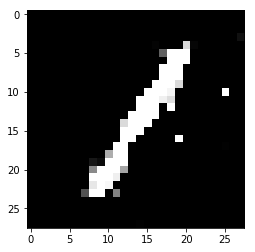

Number batches 78
43(0/78) D: 0.2707, G: 2.1115
43(1/78) D: 0.2275, G: 2.7602
43(2/78) D: 0.2718, G: 2.0993
43(3/78) D: 0.2783, G: 2.3889
43(4/78) D: 0.2589, G: 1.9150
43(5/78) D: 0.2361, G: 2.5269
43(6/78) D: 0.2476, G: 2.0500
43(7/78) D: 0.2416, G: 2.6531
43(8/78) D: 0.2860, G: 1.4839
43(9/78) D: 0.2902, G: 3.0033
43(10/78) D: 0.2037, G: 2.6367
43(11/78) D: 0.2764, G: 1.4618
43(12/78) D: 0.2601, G: 3.0209
43(13/78) D: 0.2607, G: 2.4250
43(14/78) D: 0.2365, G: 2.0567
43(15/78) D: 0.1931, G: 2.4708
43(16/78) D: 0.2194, G: 2.6544
43(17/78) D: 0.1824, G: 2.2710
43(18/78) D: 0.2573, G: 2.3041
43(19/78) D: 0.2043, G: 2.7095
43(20/78) D: 0.2311, G: 2.3423
43(21/78) D: 0.2302, G: 2.2134
43(22/78) D: 0.2889, G: 2.7163
43(23/78) D: 0.2670, G: 1.6753
43(24/78) D: 0.2599, G: 3.2998
43(25/78) D: 0.3150, G: 1.5365
43(26/78) D: 0.3253, G: 2.7013
43(27/78) D: 0.3093, G: 1.8931
43(28/78) D: 0.1797, G: 2.2995
43(29/78) D: 0.2647, G: 2.5384
43(30/78) D: 0.3013, G: 2.2291
43(31/78) D: 0.2439, G: 2.2262


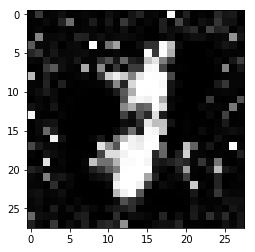

Number batches 78
44(0/78) D: 0.6054, G: 2.4087
44(1/78) D: 0.3318, G: 2.4285
44(2/78) D: 0.3526, G: 1.7595
44(3/78) D: 0.3697, G: 1.5455
44(4/78) D: 0.3546, G: 1.7946
44(5/78) D: 0.3120, G: 1.9172
44(6/78) D: 0.3132, G: 1.9902
44(7/78) D: 0.2839, G: 1.8802
44(8/78) D: 0.3320, G: 1.5998
44(9/78) D: 0.2951, G: 1.8752
44(10/78) D: 0.2235, G: 2.0375
44(11/78) D: 0.2884, G: 2.1053
44(12/78) D: 0.2513, G: 1.7881
44(13/78) D: 0.3153, G: 2.3699
44(14/78) D: 0.2757, G: 2.2748
44(15/78) D: 0.2185, G: 2.0316
44(16/78) D: 0.3010, G: 2.2778
44(17/78) D: 0.2132, G: 2.2089
44(18/78) D: 0.3511, G: 1.7246
44(19/78) D: 0.2827, G: 1.8537
44(20/78) D: 0.2592, G: 2.4459
44(21/78) D: 0.2970, G: 1.8650
44(22/78) D: 0.2831, G: 1.9192
44(23/78) D: 0.2728, G: 2.3237
44(24/78) D: 0.3037, G: 1.8541
44(25/78) D: 0.2835, G: 1.8625
44(26/78) D: 0.2825, G: 2.0905
44(27/78) D: 0.3693, G: 1.8857
44(28/78) D: 0.2478, G: 2.5269
44(29/78) D: 0.3036, G: 1.8240
44(30/78) D: 0.2875, G: 1.8466
44(31/78) D: 0.2884, G: 2.7832


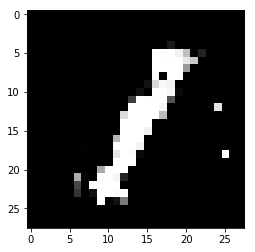

Number batches 78
45(0/78) D: 0.3257, G: 2.0074
45(1/78) D: 0.2987, G: 2.2380
45(2/78) D: 0.2478, G: 2.0027
45(3/78) D: 0.2896, G: 2.0324
45(4/78) D: 0.2072, G: 2.3746
45(5/78) D: 0.2106, G: 2.2334
45(6/78) D: 0.1959, G: 2.2531
45(7/78) D: 0.2125, G: 2.8159
45(8/78) D: 0.3260, G: 1.6005
45(9/78) D: 0.3717, G: 3.2379
45(10/78) D: 0.2842, G: 2.0674
45(11/78) D: 0.3060, G: 1.9076
45(12/78) D: 0.2396, G: 2.2436
45(13/78) D: 0.2942, G: 2.1604
45(14/78) D: 0.2455, G: 2.5270
45(15/78) D: 0.2304, G: 2.5947
45(16/78) D: 0.2452, G: 2.1401
45(17/78) D: 0.1839, G: 2.4554
45(18/78) D: 0.2445, G: 2.0579
45(19/78) D: 0.2465, G: 2.6032
45(20/78) D: 0.2158, G: 2.4338
45(21/78) D: 0.2932, G: 1.6822
45(22/78) D: 0.3313, G: 3.1298
45(23/78) D: 0.2816, G: 2.2693
45(24/78) D: 0.2415, G: 1.4028
45(25/78) D: 0.4083, G: 4.3753
45(26/78) D: 0.6571, G: 1.9116
45(27/78) D: 0.3058, G: 1.1004
45(28/78) D: 0.4110, G: 3.1698
45(29/78) D: 0.4506, G: 2.4980
45(30/78) D: 0.3231, G: 1.5209
45(31/78) D: 0.2931, G: 1.8213


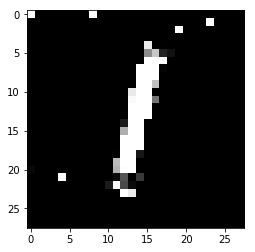

Number batches 78
46(0/78) D: 0.3478, G: 2.8264
46(1/78) D: 0.3245, G: 1.7212
46(2/78) D: 0.2600, G: 1.9985
46(3/78) D: 0.3019, G: 2.2216
46(4/78) D: 0.2880, G: 1.7709
46(5/78) D: 0.2817, G: 2.9253
46(6/78) D: 0.2754, G: 1.9642
46(7/78) D: 0.2429, G: 1.9837
46(8/78) D: 0.2919, G: 2.5006
46(9/78) D: 0.3080, G: 1.7496
46(10/78) D: 0.3200, G: 3.1863
46(11/78) D: 0.3275, G: 1.5974
46(12/78) D: 0.3488, G: 2.8110
46(13/78) D: 0.3767, G: 2.2823
46(14/78) D: 0.2331, G: 2.3519
46(15/78) D: 0.2654, G: 2.6858
46(16/78) D: 0.2800, G: 1.8471
46(17/78) D: 0.2701, G: 3.0160
46(18/78) D: 0.3543, G: 1.8190
46(19/78) D: 0.2980, G: 2.1820
46(20/78) D: 0.2366, G: 2.5718
46(21/78) D: 0.3090, G: 1.3808
46(22/78) D: 0.2948, G: 2.7752
46(23/78) D: 0.2773, G: 2.4067
46(24/78) D: 0.2682, G: 1.8095
46(25/78) D: 0.3006, G: 2.6133
46(26/78) D: 0.2728, G: 2.7519
46(27/78) D: 0.3256, G: 1.4622
46(28/78) D: 0.2825, G: 3.0985
46(29/78) D: 0.4090, G: 1.4945
46(30/78) D: 0.3109, G: 2.4958
46(31/78) D: 0.2686, G: 2.7009


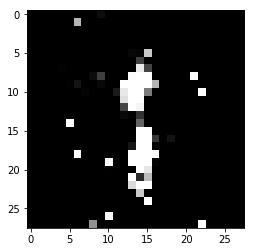

Number batches 78
47(0/78) D: 0.2809, G: 1.7448
47(1/78) D: 0.2814, G: 2.4193
47(2/78) D: 0.2749, G: 2.1054
47(3/78) D: 0.3080, G: 1.9878
47(4/78) D: 0.2255, G: 1.9333
47(5/78) D: 0.2323, G: 2.4785
47(6/78) D: 0.2094, G: 2.4553
47(7/78) D: 0.2036, G: 2.7556
47(8/78) D: 0.3042, G: 1.3710
47(9/78) D: 0.4024, G: 3.2596
47(10/78) D: 0.3456, G: 1.8716
47(11/78) D: 0.3058, G: 1.8898
47(12/78) D: 0.2555, G: 2.8242
47(13/78) D: 0.3781, G: 2.1131
47(14/78) D: 0.2419, G: 1.9473
47(15/78) D: 0.2420, G: 2.6959
47(16/78) D: 0.2475, G: 2.3723
47(17/78) D: 0.1813, G: 2.3158
47(18/78) D: 0.2298, G: 2.3394
47(19/78) D: 0.2101, G: 2.1496
47(20/78) D: 0.2341, G: 2.4355
47(21/78) D: 0.2787, G: 2.2972
47(22/78) D: 0.2489, G: 2.1512
47(23/78) D: 0.2181, G: 2.3477
47(24/78) D: 0.2732, G: 2.2335
47(25/78) D: 0.2573, G: 1.6704
47(26/78) D: 0.2895, G: 2.9351
47(27/78) D: 0.3246, G: 2.1115
47(28/78) D: 0.2096, G: 2.7496
47(29/78) D: 0.3165, G: 1.5794
47(30/78) D: 0.3659, G: 3.5484
47(31/78) D: 0.4248, G: 1.2391


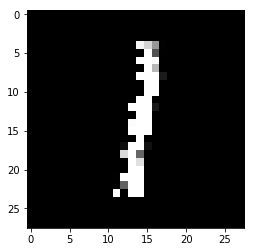

Number batches 78
48(0/78) D: 0.3043, G: 1.8078
48(1/78) D: 0.3057, G: 2.7616
48(2/78) D: 0.3027, G: 1.6917
48(3/78) D: 0.3005, G: 2.1414
48(4/78) D: 0.2432, G: 2.2029
48(5/78) D: 0.2636, G: 2.5399
48(6/78) D: 0.2314, G: 2.1235
48(7/78) D: 0.2487, G: 2.4360
48(8/78) D: 0.3468, G: 1.5300
48(9/78) D: 0.3968, G: 3.9470
48(10/78) D: 0.4757, G: 1.5680
48(11/78) D: 0.3417, G: 2.6929
48(12/78) D: 0.2631, G: 2.2727
48(13/78) D: 0.2986, G: 2.0531
48(14/78) D: 0.2819, G: 2.0096
48(15/78) D: 0.2652, G: 2.2730
48(16/78) D: 0.2424, G: 2.0743
48(17/78) D: 0.2304, G: 2.5954
48(18/78) D: 0.3008, G: 1.5305
48(19/78) D: 0.2731, G: 2.4954
48(20/78) D: 0.2679, G: 1.8976
48(21/78) D: 0.2657, G: 2.0214
48(22/78) D: 0.3038, G: 1.9899
48(23/78) D: 0.2412, G: 2.4174
48(24/78) D: 0.2545, G: 2.1786
48(25/78) D: 0.2603, G: 2.2111
48(26/78) D: 0.3466, G: 2.4081
48(27/78) D: 0.2908, G: 1.8262
48(28/78) D: 0.3219, G: 3.8428
48(29/78) D: 0.4341, G: 0.9727
48(30/78) D: 0.5103, G: 3.5037
48(31/78) D: 0.3598, G: 2.4940


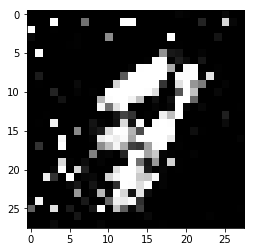

Number batches 78
49(0/78) D: 0.3119, G: 2.9015
49(1/78) D: 0.2770, G: 2.2125
49(2/78) D: 0.2387, G: 1.8416
49(3/78) D: 0.3074, G: 2.3540
49(4/78) D: 0.2549, G: 1.9986
49(5/78) D: 0.2916, G: 2.3110
49(6/78) D: 0.2291, G: 2.3484
49(7/78) D: 0.2676, G: 2.0593
49(8/78) D: 0.3158, G: 2.1567
49(9/78) D: 0.3045, G: 2.8651
49(10/78) D: 0.2773, G: 1.6902
49(11/78) D: 0.2967, G: 3.2530
49(12/78) D: 0.3287, G: 1.7550
49(13/78) D: 0.3418, G: 2.6307
49(14/78) D: 0.2957, G: 2.4665
49(15/78) D: 0.2818, G: 1.9696
49(16/78) D: 0.2954, G: 3.0354
49(17/78) D: 0.2429, G: 2.0074
49(18/78) D: 0.2667, G: 1.7327
49(19/78) D: 0.3094, G: 3.2487
49(20/78) D: 0.3323, G: 2.0211
49(21/78) D: 0.2776, G: 2.2393
49(22/78) D: 0.3019, G: 2.8112
49(23/78) D: 0.2932, G: 1.4748
49(24/78) D: 0.2877, G: 2.5603
49(25/78) D: 0.3058, G: 1.7179
49(26/78) D: 0.3244, G: 2.3405
49(27/78) D: 0.3123, G: 1.9961
49(28/78) D: 0.2256, G: 2.5750
49(29/78) D: 0.2463, G: 2.1328
49(30/78) D: 0.2750, G: 2.2443
49(31/78) D: 0.2211, G: 2.0662


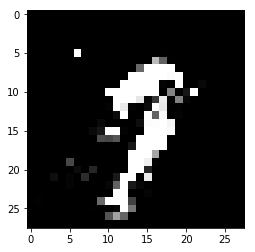

Number batches 78
50(0/78) D: 0.3760, G: 3.1895
50(1/78) D: 0.4255, G: 1.2708
50(2/78) D: 0.3162, G: 2.0116
50(3/78) D: 0.3159, G: 2.0370
50(4/78) D: 0.2647, G: 2.2329
50(5/78) D: 0.3002, G: 2.0388
50(6/78) D: 0.2454, G: 1.8312
50(7/78) D: 0.2681, G: 2.5558
50(8/78) D: 0.3402, G: 1.4710
50(9/78) D: 0.3075, G: 2.1150
50(10/78) D: 0.2872, G: 1.6621
50(11/78) D: 0.2996, G: 2.6814
50(12/78) D: 0.3239, G: 1.8982
50(13/78) D: 0.2568, G: 1.5003
50(14/78) D: 0.3139, G: 2.9739
50(15/78) D: 0.3584, G: 1.5406
50(16/78) D: 0.3289, G: 2.5780
50(17/78) D: 0.3468, G: 1.6256
50(18/78) D: 0.3204, G: 2.1161
50(19/78) D: 0.2412, G: 2.8072
50(20/78) D: 0.3440, G: 2.3418
50(21/78) D: 0.2992, G: 1.8442
50(22/78) D: 0.2833, G: 2.0183
50(23/78) D: 0.2523, G: 2.2433
50(24/78) D: 0.3011, G: 1.8380
50(25/78) D: 0.3100, G: 2.4202
50(26/78) D: 0.3184, G: 1.8966
50(27/78) D: 0.3291, G: 1.9190
50(28/78) D: 0.2860, G: 2.7477
50(29/78) D: 0.3042, G: 2.1587
50(30/78) D: 0.3130, G: 1.6909
50(31/78) D: 0.2931, G: 2.7476


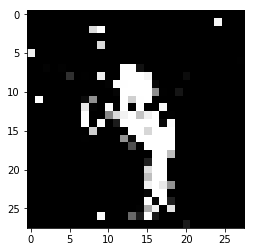

Number batches 78
51(0/78) D: 0.2990, G: 2.2659
51(1/78) D: 0.2786, G: 2.3211
51(2/78) D: 0.3173, G: 1.5234
51(3/78) D: 0.3137, G: 2.6554
51(4/78) D: 0.3021, G: 2.0314
51(5/78) D: 0.2522, G: 2.0562
51(6/78) D: 0.3037, G: 2.5117
51(7/78) D: 0.2090, G: 2.0205
51(8/78) D: 0.3225, G: 2.9217
51(9/78) D: 0.3495, G: 1.4076
51(10/78) D: 0.3621, G: 3.3566
51(11/78) D: 0.4166, G: 1.9806
51(12/78) D: 0.3370, G: 2.0854
51(13/78) D: 0.3457, G: 2.3847
51(14/78) D: 0.2853, G: 1.7931
51(15/78) D: 0.3329, G: 2.4108
51(16/78) D: 0.2863, G: 1.6715
51(17/78) D: 0.2306, G: 2.5188
51(18/78) D: 0.2996, G: 1.9644
51(19/78) D: 0.2516, G: 1.9225
51(20/78) D: 0.2551, G: 2.8036
51(21/78) D: 0.3748, G: 1.5881
51(22/78) D: 0.3724, G: 2.5849
51(23/78) D: 0.2947, G: 2.1509
51(24/78) D: 0.2475, G: 1.7616
51(25/78) D: 0.3443, G: 2.5834
51(26/78) D: 0.3630, G: 1.7120
51(27/78) D: 0.2906, G: 1.9677
51(28/78) D: 0.2348, G: 2.1394
51(29/78) D: 0.2698, G: 1.8825
51(30/78) D: 0.3283, G: 3.0975
51(31/78) D: 0.3206, G: 1.5338


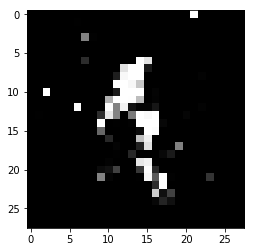

Number batches 78
52(0/78) D: 0.3355, G: 1.5037
52(1/78) D: 0.3178, G: 2.4420
52(2/78) D: 0.3836, G: 1.4890
52(3/78) D: 0.3091, G: 1.8573
52(4/78) D: 0.2954, G: 2.2938
52(5/78) D: 0.2823, G: 1.8701
52(6/78) D: 0.2775, G: 1.9779
52(7/78) D: 0.2569, G: 2.6145
52(8/78) D: 0.3514, G: 1.3750
52(9/78) D: 0.3950, G: 3.3085
52(10/78) D: 0.4443, G: 1.2689
52(11/78) D: 0.4164, G: 2.5534
52(12/78) D: 0.3399, G: 2.2288
52(13/78) D: 0.3253, G: 1.7001
52(14/78) D: 0.3319, G: 2.4929
52(15/78) D: 0.2885, G: 2.1530
52(16/78) D: 0.2777, G: 1.7419
52(17/78) D: 0.2418, G: 2.3300
52(18/78) D: 0.2536, G: 2.1830
52(19/78) D: 0.2550, G: 1.9476
52(20/78) D: 0.2525, G: 2.5803
52(21/78) D: 0.3171, G: 1.7152
52(22/78) D: 0.2799, G: 2.2119
52(23/78) D: 0.2808, G: 2.7068
52(24/78) D: 0.2905, G: 1.4150
52(25/78) D: 0.3367, G: 2.5245
52(26/78) D: 0.3154, G: 2.3686
52(27/78) D: 0.3026, G: 1.5723
52(28/78) D: 0.2673, G: 2.7452
52(29/78) D: 0.3457, G: 1.7503
52(30/78) D: 0.3199, G: 2.3040
52(31/78) D: 0.2719, G: 1.9330


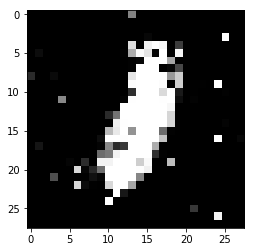

Number batches 78
53(0/78) D: 0.3205, G: 2.1970
53(1/78) D: 0.3037, G: 2.6638
53(2/78) D: 0.2817, G: 1.4082
53(3/78) D: 0.3355, G: 2.2950
53(4/78) D: 0.3530, G: 1.4979
53(5/78) D: 0.3150, G: 3.1869
53(6/78) D: 0.3285, G: 1.8488
53(7/78) D: 0.3719, G: 2.5848
53(8/78) D: 0.4075, G: 1.2426
53(9/78) D: 0.4187, G: 2.4559
53(10/78) D: 0.3093, G: 2.1355
53(11/78) D: 0.3121, G: 1.6857
53(12/78) D: 0.2926, G: 1.9676
53(13/78) D: 0.2636, G: 2.0815
53(14/78) D: 0.2664, G: 2.0129
53(15/78) D: 0.2648, G: 2.0012
53(16/78) D: 0.2920, G: 2.5111
53(17/78) D: 0.2468, G: 2.6687
53(18/78) D: 0.3631, G: 1.2383
53(19/78) D: 0.3538, G: 2.9899
53(20/78) D: 0.3206, G: 2.1348
53(21/78) D: 0.3073, G: 1.6821
53(22/78) D: 0.3054, G: 2.1558
53(23/78) D: 0.2879, G: 2.3867
53(24/78) D: 0.3113, G: 1.7287
53(25/78) D: 0.3466, G: 1.6744
53(26/78) D: 0.3553, G: 2.5713
53(27/78) D: 0.3684, G: 1.5472
53(28/78) D: 0.2848, G: 2.2869
53(29/78) D: 0.3272, G: 1.7399
53(30/78) D: 0.3064, G: 1.8576
53(31/78) D: 0.2911, G: 2.3390


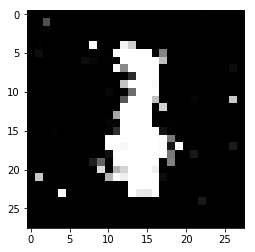

Number batches 78
54(0/78) D: 0.3260, G: 1.4612
54(1/78) D: 0.3707, G: 2.8390
54(2/78) D: 0.3668, G: 1.4090
54(3/78) D: 0.3983, G: 2.6400
54(4/78) D: 0.3561, G: 1.7913
54(5/78) D: 0.2734, G: 2.2213
54(6/78) D: 0.2456, G: 2.4436
54(7/78) D: 0.2277, G: 2.0843
54(8/78) D: 0.2814, G: 1.9355
54(9/78) D: 0.2865, G: 1.9206
54(10/78) D: 0.2873, G: 3.2463
54(11/78) D: 0.3786, G: 2.0190
54(12/78) D: 0.2918, G: 1.7798
54(13/78) D: 0.3024, G: 2.4157
54(14/78) D: 0.2668, G: 2.0930
54(15/78) D: 0.2831, G: 1.7431
54(16/78) D: 0.3016, G: 2.7351
54(17/78) D: 0.3004, G: 1.9883
54(18/78) D: 0.3592, G: 2.6837
54(19/78) D: 0.2614, G: 2.2492
54(20/78) D: 0.2589, G: 2.4622
54(21/78) D: 0.2913, G: 1.9325
54(22/78) D: 0.3172, G: 2.3275
54(23/78) D: 0.2533, G: 2.5713
54(24/78) D: 0.3106, G: 1.6375
54(25/78) D: 0.3438, G: 2.3366
54(26/78) D: 0.2896, G: 1.5522
54(27/78) D: 0.4197, G: 3.4193
54(28/78) D: 0.3604, G: 1.9558
54(29/78) D: 0.2914, G: 1.7209
54(30/78) D: 0.3015, G: 2.3189
54(31/78) D: 0.3119, G: 2.2257


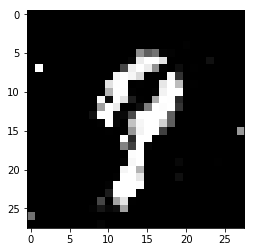

Number batches 78
55(0/78) D: 0.2736, G: 2.3441
55(1/78) D: 0.3118, G: 2.1414
55(2/78) D: 0.2889, G: 1.8623
55(3/78) D: 0.3549, G: 2.6227
55(4/78) D: 0.3550, G: 1.8997
55(5/78) D: 0.2828, G: 2.4344
55(6/78) D: 0.2662, G: 2.2173
55(7/78) D: 0.2756, G: 2.1687
55(8/78) D: 0.3638, G: 2.1795
55(9/78) D: 0.4497, G: 1.3892
55(10/78) D: 0.3178, G: 2.4649
55(11/78) D: 0.2857, G: 2.2937
55(12/78) D: 0.3227, G: 1.6361
55(13/78) D: 0.3054, G: 2.2348
55(14/78) D: 0.2361, G: 2.0991
55(15/78) D: 0.2794, G: 2.1276
55(16/78) D: 0.2599, G: 1.9274
55(17/78) D: 0.3225, G: 3.0262
55(18/78) D: 0.2446, G: 2.0575
55(19/78) D: 0.2811, G: 2.1742
55(20/78) D: 0.2374, G: 2.8183
55(21/78) D: 0.2570, G: 1.8000
55(22/78) D: 0.3192, G: 2.5516
55(23/78) D: 0.2254, G: 1.9489
55(24/78) D: 0.3125, G: 1.9160
55(25/78) D: 0.3199, G: 2.1987
55(26/78) D: 0.3260, G: 2.2985
55(27/78) D: 0.2904, G: 1.8326
55(28/78) D: 0.2822, G: 3.1445
55(29/78) D: 0.3785, G: 1.2043
55(30/78) D: 0.4857, G: 3.6972
55(31/78) D: 0.5914, G: 1.6951


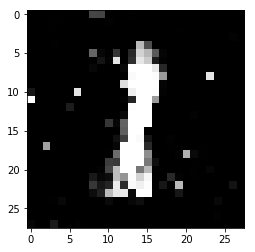

Number batches 78
56(0/78) D: 0.3851, G: 2.8793
56(1/78) D: 0.3340, G: 1.7065
56(2/78) D: 0.3638, G: 2.4489
56(3/78) D: 0.3976, G: 1.4460
56(4/78) D: 0.3335, G: 2.8604
56(5/78) D: 0.3300, G: 2.1440
56(6/78) D: 0.2825, G: 1.7818
56(7/78) D: 0.3009, G: 2.7742
56(8/78) D: 0.3486, G: 1.6157
56(9/78) D: 0.3597, G: 2.0266
56(10/78) D: 0.2890, G: 2.5591
56(11/78) D: 0.2680, G: 1.9176
56(12/78) D: 0.3382, G: 2.5565
56(13/78) D: 0.3401, G: 1.8642
56(14/78) D: 0.2932, G: 2.1042
56(15/78) D: 0.2358, G: 2.7860
56(16/78) D: 0.2931, G: 2.3964
56(17/78) D: 0.2218, G: 2.2656
56(18/78) D: 0.3116, G: 1.4157
56(19/78) D: 0.3556, G: 3.0227
56(20/78) D: 0.2949, G: 2.3191
56(21/78) D: 0.2911, G: 1.4461
56(22/78) D: 0.3425, G: 2.7560
56(23/78) D: 0.2817, G: 2.0575
56(24/78) D: 0.3262, G: 1.2533
56(25/78) D: 0.3913, G: 2.5625
56(26/78) D: 0.3917, G: 2.2812
56(27/78) D: 0.3211, G: 1.8031
56(28/78) D: 0.2901, G: 2.2525
56(29/78) D: 0.2752, G: 1.8549
56(30/78) D: 0.2875, G: 1.9728
56(31/78) D: 0.2520, G: 2.0976


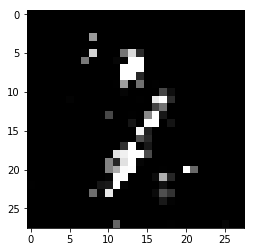

Number batches 78
57(0/78) D: 0.3832, G: 1.7349
57(1/78) D: 0.2789, G: 2.2140
57(2/78) D: 0.2812, G: 1.9616
57(3/78) D: 0.3336, G: 1.9948
57(4/78) D: 0.3488, G: 2.0592
57(5/78) D: 0.2830, G: 1.9913
57(6/78) D: 0.2782, G: 2.7669
57(7/78) D: 0.3335, G: 1.9026
57(8/78) D: 0.3129, G: 2.3087
57(9/78) D: 0.3392, G: 1.5400
57(10/78) D: 0.3006, G: 2.7760
57(11/78) D: 0.3260, G: 1.8778
57(12/78) D: 0.2881, G: 2.4198
57(13/78) D: 0.3182, G: 2.3585
57(14/78) D: 0.2520, G: 2.0403
57(15/78) D: 0.2509, G: 2.5030
57(16/78) D: 0.2886, G: 2.0537
57(17/78) D: 0.2507, G: 2.9723
57(18/78) D: 0.4732, G: 1.1850
57(19/78) D: 0.4233, G: 3.2403
57(20/78) D: 0.3220, G: 2.3776
57(21/78) D: 0.3115, G: 1.3028
57(22/78) D: 0.3375, G: 1.9593
57(23/78) D: 0.2570, G: 2.5737
57(24/78) D: 0.2946, G: 1.6468
57(25/78) D: 0.3168, G: 1.9652
57(26/78) D: 0.3380, G: 1.8791
57(27/78) D: 0.2815, G: 2.0416
57(28/78) D: 0.3168, G: 2.3834
57(29/78) D: 0.2704, G: 1.9068
57(30/78) D: 0.3043, G: 1.8943
57(31/78) D: 0.2874, G: 2.4054


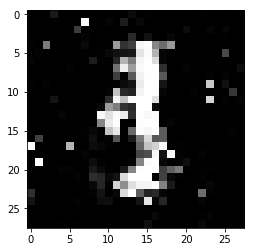

Number batches 78
58(0/78) D: 0.3447, G: 1.7316
58(1/78) D: 0.2704, G: 2.7511
58(2/78) D: 0.3811, G: 1.9960
58(3/78) D: 0.3647, G: 2.2435
58(4/78) D: 0.3346, G: 1.7107
58(5/78) D: 0.2785, G: 1.9462
58(6/78) D: 0.2444, G: 2.4170
58(7/78) D: 0.3015, G: 1.7382
58(8/78) D: 0.3139, G: 1.9799
58(9/78) D: 0.3742, G: 2.5634
58(10/78) D: 0.3023, G: 1.5579
58(11/78) D: 0.3376, G: 2.5305
58(12/78) D: 0.3076, G: 1.9901
58(13/78) D: 0.3321, G: 1.8361
58(14/78) D: 0.2980, G: 2.6013
58(15/78) D: 0.3201, G: 1.6831
58(16/78) D: 0.3021, G: 2.9423
58(17/78) D: 0.2757, G: 2.1543
58(18/78) D: 0.2874, G: 1.9647
58(19/78) D: 0.2893, G: 3.0330
58(20/78) D: 0.3001, G: 2.0532
58(21/78) D: 0.3029, G: 1.6832
58(22/78) D: 0.3058, G: 3.0962
58(23/78) D: 0.3040, G: 1.5230
58(24/78) D: 0.3257, G: 2.6417
58(25/78) D: 0.3840, G: 1.6247
58(26/78) D: 0.3376, G: 2.1708
58(27/78) D: 0.3260, G: 2.4174
58(28/78) D: 0.2442, G: 1.9993
58(29/78) D: 0.3183, G: 2.2722
58(30/78) D: 0.3779, G: 2.0441
58(31/78) D: 0.2837, G: 1.6418


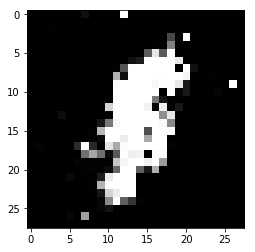

Number batches 78
59(0/78) D: 0.4623, G: 0.9107
59(1/78) D: 0.5335, G: 3.0218
59(2/78) D: 0.4142, G: 2.4126
59(3/78) D: 0.3440, G: 1.5414
59(4/78) D: 0.2971, G: 1.5221
59(5/78) D: 0.3381, G: 2.2021
59(6/78) D: 0.2985, G: 2.0281
59(7/78) D: 0.2889, G: 1.8566
59(8/78) D: 0.3477, G: 1.8920
59(9/78) D: 0.3884, G: 1.5925
59(10/78) D: 0.3172, G: 1.9427
59(11/78) D: 0.2995, G: 2.1186
59(12/78) D: 0.3457, G: 2.2567
59(13/78) D: 0.3430, G: 1.5990
59(14/78) D: 0.3235, G: 2.4896
59(15/78) D: 0.3638, G: 1.4423
59(16/78) D: 0.3353, G: 2.6857
59(17/78) D: 0.2609, G: 2.8036
59(18/78) D: 0.4029, G: 1.3765
59(19/78) D: 0.3235, G: 2.4580
59(20/78) D: 0.3035, G: 2.1728
59(21/78) D: 0.3277, G: 1.6846
59(22/78) D: 0.3200, G: 2.1181
59(23/78) D: 0.2852, G: 2.2085
59(24/78) D: 0.3335, G: 1.6972
59(25/78) D: 0.3900, G: 1.4623
59(26/78) D: 0.3582, G: 2.3882
59(27/78) D: 0.3357, G: 1.6090
59(28/78) D: 0.2603, G: 2.1162
59(29/78) D: 0.2940, G: 2.3940
59(30/78) D: 0.3658, G: 1.5575
59(31/78) D: 0.3603, G: 2.4980


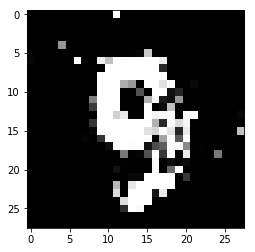

Number batches 78
60(0/78) D: 0.3552, G: 1.7420
60(1/78) D: 0.2903, G: 2.4525
60(2/78) D: 0.3421, G: 1.3761
60(3/78) D: 0.3837, G: 2.7788
60(4/78) D: 0.4393, G: 1.5243
60(5/78) D: 0.3750, G: 2.3416
60(6/78) D: 0.2808, G: 2.3160
60(7/78) D: 0.2807, G: 1.7142
60(8/78) D: 0.3549, G: 1.7723
60(9/78) D: 0.3731, G: 2.0401
60(10/78) D: 0.3393, G: 1.8334
60(11/78) D: 0.3194, G: 2.0041
60(12/78) D: 0.3866, G: 1.7788
60(13/78) D: 0.3167, G: 2.0899
60(14/78) D: 0.3035, G: 1.7200
60(15/78) D: 0.3190, G: 2.5592
60(16/78) D: 0.3493, G: 1.8032
60(17/78) D: 0.3151, G: 2.4009
60(18/78) D: 0.3213, G: 1.7676
60(19/78) D: 0.2774, G: 2.5276
60(20/78) D: 0.3280, G: 2.1576
60(21/78) D: 0.3291, G: 1.8897
60(22/78) D: 0.3377, G: 2.0691
60(23/78) D: 0.3096, G: 1.9987
60(24/78) D: 0.3394, G: 1.4633
60(25/78) D: 0.3618, G: 2.1877
60(26/78) D: 0.3623, G: 2.1994
60(27/78) D: 0.3263, G: 1.4492
60(28/78) D: 0.3206, G: 3.1217
60(29/78) D: 0.4273, G: 1.0155
60(30/78) D: 0.4747, G: 3.6473
60(31/78) D: 0.4455, G: 2.0964


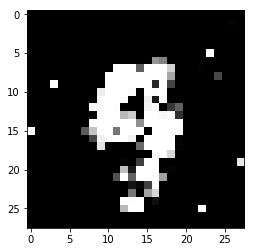

Number batches 78
61(0/78) D: 0.3853, G: 1.6054
61(1/78) D: 0.3584, G: 2.7396
61(2/78) D: 0.4028, G: 1.5956
61(3/78) D: 0.3954, G: 2.1751
61(4/78) D: 0.2914, G: 2.1186
61(5/78) D: 0.3675, G: 1.5941
61(6/78) D: 0.3173, G: 2.3949
61(7/78) D: 0.2748, G: 2.0607
61(8/78) D: 0.3945, G: 1.3846
61(9/78) D: 0.3956, G: 2.1764
61(10/78) D: 0.3703, G: 1.7666
61(11/78) D: 0.3446, G: 1.3273
61(12/78) D: 0.3272, G: 1.8778
61(13/78) D: 0.3552, G: 2.1757
61(14/78) D: 0.3606, G: 1.3144
61(15/78) D: 0.3510, G: 2.6440
61(16/78) D: 0.3473, G: 1.6017
61(17/78) D: 0.2745, G: 2.0053
61(18/78) D: 0.3341, G: 1.6576
61(19/78) D: 0.3601, G: 2.8236
61(20/78) D: 0.3460, G: 2.0334
61(21/78) D: 0.3732, G: 1.5490
61(22/78) D: 0.3623, G: 2.3548
61(23/78) D: 0.3594, G: 1.7473
61(24/78) D: 0.4116, G: 1.8560
61(25/78) D: 0.3615, G: 1.8109
61(26/78) D: 0.4079, G: 2.5123
61(27/78) D: 0.4151, G: 0.9909
61(28/78) D: 0.4474, G: 3.2826
61(29/78) D: 0.5462, G: 1.8607
61(30/78) D: 0.3702, G: 1.6243
61(31/78) D: 0.3802, G: 2.3807


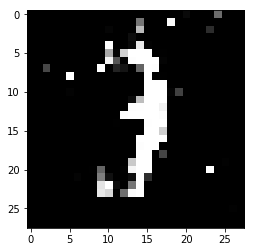

Number batches 78
62(0/78) D: 0.3938, G: 2.1725
62(1/78) D: 0.3359, G: 1.9673
62(2/78) D: 0.3316, G: 1.5252
62(3/78) D: 0.3500, G: 2.6157
62(4/78) D: 0.3371, G: 1.4519
62(5/78) D: 0.3158, G: 2.0098
62(6/78) D: 0.3102, G: 2.8390
62(7/78) D: 0.3551, G: 1.9538
62(8/78) D: 0.3836, G: 1.8129
62(9/78) D: 0.4075, G: 2.4935
62(10/78) D: 0.3091, G: 1.8833
62(11/78) D: 0.3160, G: 1.6536
62(12/78) D: 0.3488, G: 2.1840
62(13/78) D: 0.3763, G: 1.6768
62(14/78) D: 0.3584, G: 1.8233
62(15/78) D: 0.3178, G: 2.3329
62(16/78) D: 0.3630, G: 2.3104
62(17/78) D: 0.2975, G: 1.7437
62(18/78) D: 0.3801, G: 2.2823
62(19/78) D: 0.3203, G: 1.9150
62(20/78) D: 0.3160, G: 2.2412
62(21/78) D: 0.3662, G: 1.4724
62(22/78) D: 0.3401, G: 2.4663
62(23/78) D: 0.3209, G: 1.5897
62(24/78) D: 0.3607, G: 1.6629
62(25/78) D: 0.3231, G: 1.9952
62(26/78) D: 0.3486, G: 2.1240
62(27/78) D: 0.3006, G: 1.7314
62(28/78) D: 0.3193, G: 2.6421
62(29/78) D: 0.3475, G: 1.4334
62(30/78) D: 0.3873, G: 2.7963
62(31/78) D: 0.4102, G: 1.6020


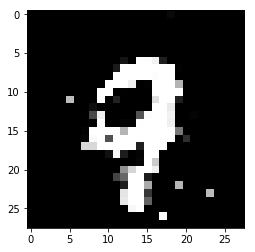

Number batches 78
63(0/78) D: 0.3348, G: 1.7550
63(1/78) D: 0.3406, G: 2.2789
63(2/78) D: 0.3630, G: 1.6754
63(3/78) D: 0.3801, G: 2.2525
63(4/78) D: 0.3730, G: 1.0938
63(5/78) D: 0.3387, G: 2.4774
63(6/78) D: 0.3014, G: 2.1420
63(7/78) D: 0.2619, G: 1.8150
63(8/78) D: 0.3433, G: 1.7460
63(9/78) D: 0.4150, G: 2.2611
63(10/78) D: 0.2853, G: 2.1002
63(11/78) D: 0.3175, G: 1.7129
63(12/78) D: 0.3259, G: 2.2747
63(13/78) D: 0.3920, G: 1.6404
63(14/78) D: 0.3252, G: 2.2392
63(15/78) D: 0.2695, G: 2.0905
63(16/78) D: 0.2788, G: 1.7990
63(17/78) D: 0.3085, G: 2.9053
63(18/78) D: 0.4009, G: 1.8279
63(19/78) D: 0.2890, G: 2.1082
63(20/78) D: 0.3217, G: 2.3588
63(21/78) D: 0.3109, G: 1.5643
63(22/78) D: 0.3019, G: 2.3860
63(23/78) D: 0.3209, G: 2.0204
63(24/78) D: 0.3262, G: 1.5808
63(25/78) D: 0.3075, G: 2.3296
63(26/78) D: 0.3562, G: 2.3419
63(27/78) D: 0.3740, G: 1.4938
63(28/78) D: 0.3394, G: 2.8704
63(29/78) D: 0.4390, G: 1.4846
63(30/78) D: 0.3472, G: 1.5325
63(31/78) D: 0.3498, G: 2.5830


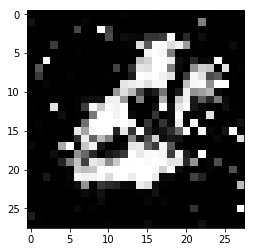

Number batches 78
64(0/78) D: 0.3953, G: 1.9025
64(1/78) D: 0.3650, G: 1.9064
64(2/78) D: 0.3705, G: 1.3114
64(3/78) D: 0.3520, G: 2.5379
64(4/78) D: 0.3603, G: 1.8995
64(5/78) D: 0.3474, G: 1.4442
64(6/78) D: 0.3238, G: 2.5503
64(7/78) D: 0.3527, G: 1.7445
64(8/78) D: 0.3490, G: 1.5680
64(9/78) D: 0.4290, G: 2.2306
64(10/78) D: 0.2764, G: 2.1134
64(11/78) D: 0.2863, G: 2.1281
64(12/78) D: 0.3271, G: 1.9019
64(13/78) D: 0.3466, G: 1.6659
64(14/78) D: 0.3492, G: 2.6363
64(15/78) D: 0.3252, G: 1.6605
64(16/78) D: 0.3388, G: 1.8302
64(17/78) D: 0.2495, G: 2.1808
64(18/78) D: 0.3494, G: 1.8153
64(19/78) D: 0.3881, G: 1.9796
64(20/78) D: 0.2866, G: 2.1339
64(21/78) D: 0.3708, G: 1.7323
64(22/78) D: 0.3463, G: 1.7376
64(23/78) D: 0.3272, G: 2.1831
64(24/78) D: 0.3639, G: 1.4593
64(25/78) D: 0.3185, G: 2.0976
64(26/78) D: 0.3260, G: 2.0046
64(27/78) D: 0.3581, G: 1.8226
64(28/78) D: 0.2707, G: 2.3597
64(29/78) D: 0.3286, G: 1.6307
64(30/78) D: 0.3336, G: 1.7250
64(31/78) D: 0.4038, G: 2.6442


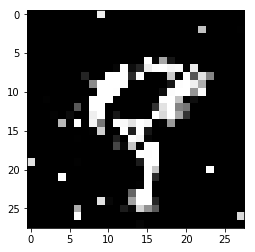

Number batches 78
65(0/78) D: 0.4119, G: 1.4438
65(1/78) D: 0.4505, G: 2.6883
65(2/78) D: 0.5021, G: 1.0724
65(3/78) D: 0.4593, G: 2.3574
65(4/78) D: 0.3880, G: 1.8194
65(5/78) D: 0.3754, G: 1.3651
65(6/78) D: 0.3722, G: 2.1610
65(7/78) D: 0.3569, G: 1.7341
65(8/78) D: 0.3635, G: 1.3284
65(9/78) D: 0.4918, G: 2.2816
65(10/78) D: 0.4135, G: 1.4714
65(11/78) D: 0.2901, G: 1.5163
65(12/78) D: 0.3987, G: 2.2955
65(13/78) D: 0.3467, G: 1.8706
65(14/78) D: 0.3716, G: 1.4011
65(15/78) D: 0.3718, G: 2.2219
65(16/78) D: 0.3759, G: 1.9360
65(17/78) D: 0.3152, G: 1.9273
65(18/78) D: 0.4017, G: 1.3844
65(19/78) D: 0.3123, G: 1.8818
65(20/78) D: 0.3338, G: 2.1442
65(21/78) D: 0.3434, G: 1.4838
65(22/78) D: 0.3683, G: 2.0654
65(23/78) D: 0.2934, G: 2.0802
65(24/78) D: 0.3402, G: 1.4454
65(25/78) D: 0.3996, G: 2.3200
65(26/78) D: 0.3873, G: 1.4535
65(27/78) D: 0.4529, G: 1.9675
65(28/78) D: 0.3121, G: 2.1167
65(29/78) D: 0.3360, G: 1.5100
65(30/78) D: 0.3992, G: 1.9666
65(31/78) D: 0.3185, G: 1.9833


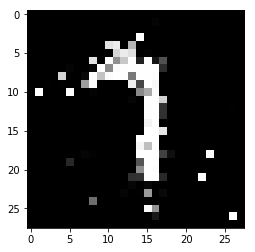

Number batches 78
66(0/78) D: 0.4740, G: 1.7825
66(1/78) D: 0.3988, G: 1.5302
66(2/78) D: 0.4413, G: 1.4934
66(3/78) D: 0.3390, G: 1.4194
66(4/78) D: 0.4161, G: 1.5357
66(5/78) D: 0.3671, G: 1.7457
66(6/78) D: 0.3283, G: 1.9150
66(7/78) D: 0.3057, G: 1.6785
66(8/78) D: 0.3796, G: 1.8035
66(9/78) D: 0.4658, G: 1.7122
66(10/78) D: 0.3762, G: 1.9085
66(11/78) D: 0.3626, G: 1.7833
66(12/78) D: 0.3399, G: 1.6844
66(13/78) D: 0.3631, G: 1.9345
66(14/78) D: 0.3661, G: 1.7674
66(15/78) D: 0.3637, G: 1.6413
66(16/78) D: 0.3615, G: 2.0321
66(17/78) D: 0.3782, G: 2.1883
66(18/78) D: 0.3895, G: 1.3246
66(19/78) D: 0.4481, G: 2.2852
66(20/78) D: 0.4179, G: 1.9183
66(21/78) D: 0.3609, G: 1.5475
66(22/78) D: 0.3874, G: 1.9184
66(23/78) D: 0.3476, G: 1.7180
66(24/78) D: 0.3749, G: 1.6753
66(25/78) D: 0.3803, G: 2.0016
66(26/78) D: 0.3467, G: 1.5887
66(27/78) D: 0.4046, G: 1.4589
66(28/78) D: 0.3767, G: 2.7161
66(29/78) D: 0.4083, G: 1.4346
66(30/78) D: 0.3737, G: 1.4366
66(31/78) D: 0.3768, G: 2.2012


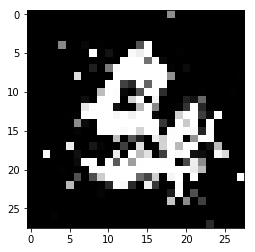

Number batches 78
67(0/78) D: 0.3816, G: 2.0848
67(1/78) D: 0.3952, G: 2.1212
67(2/78) D: 0.4100, G: 1.3323
67(3/78) D: 0.3563, G: 1.8161
67(4/78) D: 0.3868, G: 1.7386
67(5/78) D: 0.3844, G: 1.6741
67(6/78) D: 0.3400, G: 1.7806
67(7/78) D: 0.3073, G: 1.9586
67(8/78) D: 0.3999, G: 1.7226
67(9/78) D: 0.3792, G: 1.4483
67(10/78) D: 0.3540, G: 2.0107
67(11/78) D: 0.3231, G: 1.9281
67(12/78) D: 0.3695, G: 1.5732
67(13/78) D: 0.3809, G: 2.2077
67(14/78) D: 0.3909, G: 1.8562
67(15/78) D: 0.3573, G: 1.6440
67(16/78) D: 0.3747, G: 2.4941
67(17/78) D: 0.3349, G: 2.3070
67(18/78) D: 0.4228, G: 1.6102
67(19/78) D: 0.3321, G: 2.0909
67(20/78) D: 0.3333, G: 2.0174
67(21/78) D: 0.3623, G: 1.3457
67(22/78) D: 0.4089, G: 2.4898
67(23/78) D: 0.3644, G: 1.7837
67(24/78) D: 0.3061, G: 1.4150
67(25/78) D: 0.3764, G: 1.9911
67(26/78) D: 0.4285, G: 2.5385
67(27/78) D: 0.4304, G: 1.4814
67(28/78) D: 0.3609, G: 2.2465
67(29/78) D: 0.3997, G: 1.7190
67(30/78) D: 0.3729, G: 1.1087
67(31/78) D: 0.3888, G: 1.8393


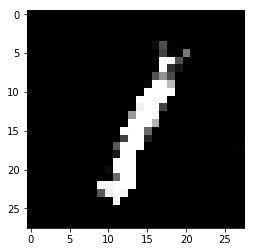

Number batches 78
68(0/78) D: 0.4133, G: 2.2614
68(1/78) D: 0.3473, G: 1.8427
68(2/78) D: 0.3627, G: 1.3745
68(3/78) D: 0.3565, G: 2.4090
68(4/78) D: 0.3424, G: 1.8245
68(5/78) D: 0.3294, G: 1.6784
68(6/78) D: 0.3486, G: 2.6913
68(7/78) D: 0.3311, G: 1.5841
68(8/78) D: 0.3806, G: 1.6801
68(9/78) D: 0.4591, G: 1.7939
68(10/78) D: 0.3440, G: 1.7786
68(11/78) D: 0.4048, G: 1.9838
68(12/78) D: 0.4109, G: 1.8374
68(13/78) D: 0.4055, G: 1.3829
68(14/78) D: 0.4119, G: 2.3994
68(15/78) D: 0.4213, G: 1.2456
68(16/78) D: 0.4072, G: 1.7275
68(17/78) D: 0.3678, G: 2.4956
68(18/78) D: 0.4350, G: 1.3686
68(19/78) D: 0.3198, G: 1.6595
68(20/78) D: 0.3341, G: 1.9405
68(21/78) D: 0.3827, G: 1.7174
68(22/78) D: 0.3767, G: 1.5832
68(23/78) D: 0.3372, G: 1.9522
68(24/78) D: 0.4051, G: 1.4417
68(25/78) D: 0.3776, G: 1.4908
68(26/78) D: 0.4503, G: 2.4860
68(27/78) D: 0.4403, G: 1.3231
68(28/78) D: 0.3576, G: 1.8363
68(29/78) D: 0.3265, G: 1.8050
68(30/78) D: 0.3701, G: 1.6330
68(31/78) D: 0.3629, G: 1.7638


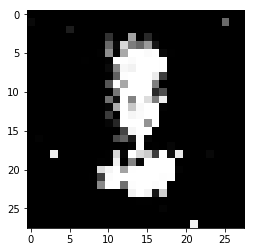

Number batches 78
69(0/78) D: 0.4001, G: 2.1399
69(1/78) D: 0.3381, G: 1.8847
69(2/78) D: 0.3811, G: 1.3796
69(3/78) D: 0.4046, G: 2.3779
69(4/78) D: 0.4142, G: 1.1386
69(5/78) D: 0.4362, G: 2.6109
69(6/78) D: 0.4474, G: 1.5865
69(7/78) D: 0.3514, G: 1.5743
69(8/78) D: 0.3615, G: 1.7557
69(9/78) D: 0.4540, G: 1.7615
69(10/78) D: 0.3895, G: 1.8054
69(11/78) D: 0.3672, G: 1.9038
69(12/78) D: 0.3939, G: 1.6562
69(13/78) D: 0.3713, G: 1.4896
69(14/78) D: 0.4414, G: 2.7905
69(15/78) D: 0.4485, G: 1.1005
69(16/78) D: 0.4367, G: 1.8486
69(17/78) D: 0.3462, G: 2.1343
69(18/78) D: 0.3916, G: 1.3093
69(19/78) D: 0.3708, G: 1.9424
69(20/78) D: 0.3489, G: 1.7362
69(21/78) D: 0.3341, G: 1.5355
69(22/78) D: 0.3054, G: 1.6041
69(23/78) D: 0.3318, G: 1.9727
69(24/78) D: 0.3569, G: 1.7619
69(25/78) D: 0.3412, G: 1.4549
69(26/78) D: 0.4185, G: 2.6280
69(27/78) D: 0.4019, G: 1.4931
69(28/78) D: 0.4137, G: 2.3670
69(29/78) D: 0.3744, G: 1.6691
69(30/78) D: 0.4133, G: 1.7936
69(31/78) D: 0.3639, G: 1.4513


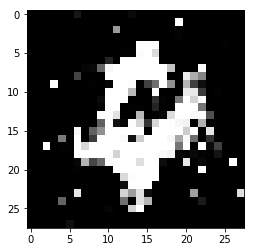

Number batches 78
70(0/78) D: 0.4059, G: 1.9802
70(1/78) D: 0.3903, G: 1.8812
70(2/78) D: 0.3858, G: 1.2301
70(3/78) D: 0.4645, G: 2.8082
70(4/78) D: 0.5546, G: 1.1605
70(5/78) D: 0.4326, G: 1.7998
70(6/78) D: 0.3239, G: 2.1142
70(7/78) D: 0.4475, G: 1.5544
70(8/78) D: 0.4206, G: 1.4534
70(9/78) D: 0.4582, G: 1.5620
70(10/78) D: 0.3319, G: 1.8742
70(11/78) D: 0.3613, G: 1.6911
70(12/78) D: 0.3236, G: 1.8150
70(13/78) D: 0.3153, G: 1.9938
70(14/78) D: 0.3130, G: 1.6625
70(15/78) D: 0.3803, G: 2.2206
70(16/78) D: 0.3722, G: 2.0231
70(17/78) D: 0.2912, G: 1.6872
70(18/78) D: 0.4778, G: 2.0610
70(19/78) D: 0.3328, G: 1.5884
70(20/78) D: 0.3458, G: 1.6533
70(21/78) D: 0.3606, G: 2.0568
70(22/78) D: 0.3518, G: 1.8147
70(23/78) D: 0.3571, G: 1.4962
70(24/78) D: 0.3810, G: 1.9075
70(25/78) D: 0.3003, G: 1.8840
70(26/78) D: 0.3500, G: 1.7687
70(27/78) D: 0.3211, G: 1.6637
70(28/78) D: 0.2949, G: 2.3101
70(29/78) D: 0.3494, G: 1.5539
70(30/78) D: 0.4050, G: 2.6022
70(31/78) D: 0.4071, G: 0.9335


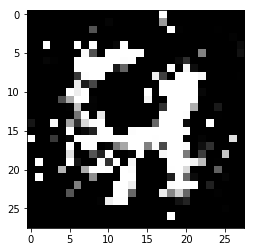

Number batches 78
71(0/78) D: 0.3879, G: 1.3308
71(1/78) D: 0.4225, G: 2.3811
71(2/78) D: 0.4125, G: 1.3722
71(3/78) D: 0.4139, G: 2.0392
71(4/78) D: 0.3412, G: 1.8878
71(5/78) D: 0.3635, G: 1.7026
71(6/78) D: 0.3086, G: 2.1075
71(7/78) D: 0.3409, G: 2.0470
71(8/78) D: 0.3360, G: 1.3040
71(9/78) D: 0.4984, G: 2.0192
71(10/78) D: 0.3733, G: 1.6407
71(11/78) D: 0.3356, G: 2.1370
71(12/78) D: 0.3545, G: 1.5393
71(13/78) D: 0.4018, G: 2.3791
71(14/78) D: 0.3301, G: 1.7888
71(15/78) D: 0.3644, G: 1.6404
71(16/78) D: 0.3374, G: 2.0906
71(17/78) D: 0.2886, G: 1.6088
71(18/78) D: 0.3720, G: 2.3494
71(19/78) D: 0.3007, G: 2.1348
71(20/78) D: 0.3299, G: 1.6893
71(21/78) D: 0.4646, G: 1.6424
71(22/78) D: 0.3592, G: 1.8664
71(23/78) D: 0.3351, G: 1.7988
71(24/78) D: 0.3607, G: 2.0211
71(25/78) D: 0.4219, G: 1.7265
71(26/78) D: 0.4163, G: 2.0531
71(27/78) D: 0.3880, G: 1.0795
71(28/78) D: 0.3959, G: 2.9620
71(29/78) D: 0.4985, G: 1.3754
71(30/78) D: 0.4194, G: 1.5517
71(31/78) D: 0.3667, G: 1.9199


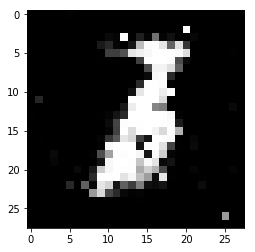

Number batches 78
72(0/78) D: 0.4370, G: 1.8072
72(1/78) D: 0.3637, G: 1.9449
72(2/78) D: 0.3703, G: 1.2204
72(3/78) D: 0.3639, G: 2.3243
72(4/78) D: 0.3515, G: 1.7256
72(5/78) D: 0.3440, G: 2.1270
72(6/78) D: 0.3630, G: 1.9336
72(7/78) D: 0.3364, G: 2.1171
72(8/78) D: 0.4076, G: 1.1428
72(9/78) D: 0.4936, G: 2.1451
72(10/78) D: 0.3874, G: 1.8232
72(11/78) D: 0.3651, G: 2.0201
72(12/78) D: 0.3593, G: 1.5313
72(13/78) D: 0.3457, G: 2.0159
72(14/78) D: 0.3334, G: 1.4674
72(15/78) D: 0.4068, G: 2.4892
72(16/78) D: 0.3582, G: 1.1491
72(17/78) D: 0.4328, G: 3.0036
72(18/78) D: 0.3996, G: 1.7095
72(19/78) D: 0.2936, G: 1.3667
72(20/78) D: 0.4307, G: 2.1917
72(21/78) D: 0.3986, G: 1.6144
72(22/78) D: 0.3433, G: 1.5113
72(23/78) D: 0.3365, G: 1.9965
72(24/78) D: 0.3956, G: 1.5425
72(25/78) D: 0.3780, G: 1.6601
72(26/78) D: 0.3300, G: 1.9695
72(27/78) D: 0.4160, G: 1.9004
72(28/78) D: 0.2888, G: 1.8900
72(29/78) D: 0.3060, G: 1.8650
72(30/78) D: 0.3844, G: 1.6549
72(31/78) D: 0.4090, G: 2.1272


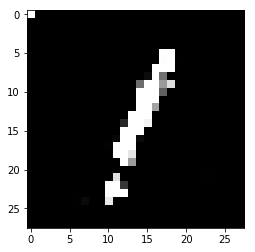

Number batches 78
73(0/78) D: 0.3394, G: 1.5448
73(1/78) D: 0.3824, G: 2.1716
73(2/78) D: 0.4019, G: 1.6491
73(3/78) D: 0.3399, G: 1.8337
73(4/78) D: 0.3042, G: 1.7729
73(5/78) D: 0.3243, G: 1.7053
73(6/78) D: 0.3441, G: 2.4384
73(7/78) D: 0.3250, G: 1.6932
73(8/78) D: 0.3986, G: 1.4823
73(9/78) D: 0.3944, G: 2.0529
73(10/78) D: 0.3518, G: 1.7780
73(11/78) D: 0.3041, G: 1.8409
73(12/78) D: 0.2958, G: 1.7165
73(13/78) D: 0.4232, G: 2.1229
73(14/78) D: 0.3493, G: 1.5208
73(15/78) D: 0.3994, G: 2.3839
73(16/78) D: 0.4134, G: 1.5762
73(17/78) D: 0.3235, G: 1.8812
73(18/78) D: 0.3239, G: 2.1003
73(19/78) D: 0.3225, G: 2.1366
73(20/78) D: 0.3483, G: 1.5719
73(21/78) D: 0.3616, G: 1.4514
73(22/78) D: 0.3682, G: 2.2364
73(23/78) D: 0.3290, G: 2.0470
73(24/78) D: 0.3951, G: 2.0361
73(25/78) D: 0.3889, G: 1.1384
73(26/78) D: 0.4378, G: 2.6275
73(27/78) D: 0.4691, G: 1.1417
73(28/78) D: 0.4162, G: 2.2936
73(29/78) D: 0.3872, G: 2.3338
73(30/78) D: 0.3667, G: 1.2277
73(31/78) D: 0.3699, G: 1.6975


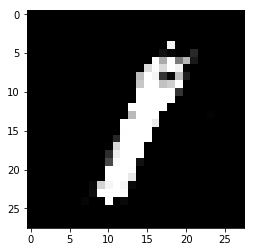

Number batches 78
74(0/78) D: 0.4104, G: 1.7341
74(1/78) D: 0.3350, G: 2.0037
74(2/78) D: 0.4547, G: 1.4585
74(3/78) D: 0.4112, G: 2.0269
74(4/78) D: 0.4000, G: 1.9685
74(5/78) D: 0.4247, G: 1.4172
74(6/78) D: 0.4203, G: 2.1579
74(7/78) D: 0.3434, G: 1.7651
74(8/78) D: 0.4572, G: 1.7096
74(9/78) D: 0.4634, G: 1.6322
74(10/78) D: 0.4254, G: 2.1398
74(11/78) D: 0.3860, G: 1.6434
74(12/78) D: 0.3976, G: 1.6378
74(13/78) D: 0.4288, G: 1.6145
74(14/78) D: 0.3701, G: 2.1464
74(15/78) D: 0.4108, G: 1.6153
74(16/78) D: 0.3679, G: 1.9895
74(17/78) D: 0.3352, G: 2.1823
74(18/78) D: 0.4165, G: 1.2055
74(19/78) D: 0.3876, G: 2.3565
74(20/78) D: 0.3500, G: 1.8705
74(21/78) D: 0.3843, G: 1.3460
74(22/78) D: 0.4022, G: 1.9592
74(23/78) D: 0.3322, G: 1.5904
74(24/78) D: 0.3581, G: 2.0738
74(25/78) D: 0.4658, G: 1.0413
74(26/78) D: 0.4340, G: 2.1749
74(27/78) D: 0.3600, G: 1.7767
74(28/78) D: 0.3114, G: 1.8434
74(29/78) D: 0.3168, G: 1.7757
74(30/78) D: 0.3335, G: 1.6554
74(31/78) D: 0.3579, G: 1.7758


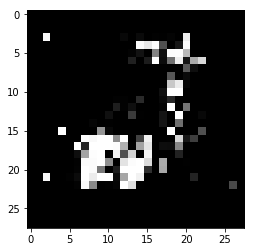

Number batches 78
75(0/78) D: 0.3576, G: 2.2496
75(1/78) D: 0.3921, G: 1.5530
75(2/78) D: 0.4106, G: 1.6405
75(3/78) D: 0.4057, G: 3.1093
75(4/78) D: 0.4826, G: 0.9974
75(5/78) D: 0.5304, G: 2.4514
75(6/78) D: 0.4077, G: 2.2022
75(7/78) D: 0.4126, G: 1.3661
75(8/78) D: 0.4312, G: 1.4695
75(9/78) D: 0.4483, G: 1.7556
75(10/78) D: 0.3870, G: 1.5902
75(11/78) D: 0.3584, G: 1.9710
75(12/78) D: 0.4238, G: 1.5832
75(13/78) D: 0.3637, G: 1.8388
75(14/78) D: 0.3874, G: 1.4836
75(15/78) D: 0.3934, G: 1.6072
75(16/78) D: 0.3426, G: 1.9958
75(17/78) D: 0.2956, G: 1.6423
75(18/78) D: 0.4094, G: 1.8819
75(19/78) D: 0.3652, G: 2.0680
75(20/78) D: 0.3525, G: 1.9266
75(21/78) D: 0.3766, G: 1.6087
75(22/78) D: 0.3963, G: 1.7744
75(23/78) D: 0.3285, G: 1.7401
75(24/78) D: 0.3621, G: 1.3449
75(25/78) D: 0.4147, G: 1.8866
75(26/78) D: 0.4142, G: 1.7819
75(27/78) D: 0.3917, G: 1.6418
75(28/78) D: 0.3586, G: 2.0834
75(29/78) D: 0.3654, G: 1.7729
75(30/78) D: 0.4065, G: 1.6245
75(31/78) D: 0.3838, G: 1.9843


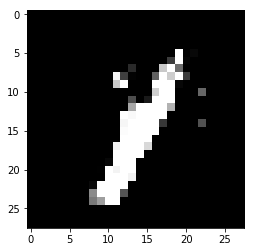

Number batches 78
76(0/78) D: 0.3575, G: 1.8910
76(1/78) D: 0.3603, G: 1.6809
76(2/78) D: 0.3796, G: 2.1873
76(3/78) D: 0.3472, G: 1.8686
76(4/78) D: 0.3447, G: 1.5750
76(5/78) D: 0.3544, G: 2.1611
76(6/78) D: 0.3508, G: 1.4148
76(7/78) D: 0.4212, G: 2.6538
76(8/78) D: 0.5156, G: 1.2262
76(9/78) D: 0.4766, G: 1.8327
76(10/78) D: 0.3647, G: 1.8548
76(11/78) D: 0.3247, G: 1.6399
76(12/78) D: 0.3762, G: 1.8923
76(13/78) D: 0.3606, G: 1.5098
76(14/78) D: 0.3543, G: 2.1041
76(15/78) D: 0.3625, G: 1.7214
76(16/78) D: 0.3655, G: 2.2593
76(17/78) D: 0.3979, G: 1.5764
76(18/78) D: 0.3706, G: 2.0397
76(19/78) D: 0.3399, G: 1.7876
76(20/78) D: 0.2996, G: 1.9928
76(21/78) D: 0.3406, G: 1.5076
76(22/78) D: 0.3655, G: 1.9810
76(23/78) D: 0.3238, G: 1.8932
76(24/78) D: 0.3271, G: 1.8107
76(25/78) D: 0.4230, G: 1.5270
76(26/78) D: 0.3953, G: 2.3613
76(27/78) D: 0.4278, G: 1.2868
76(28/78) D: 0.3718, G: 1.9365
76(29/78) D: 0.3338, G: 1.7234
76(30/78) D: 0.3772, G: 1.3380
76(31/78) D: 0.3811, G: 2.3176


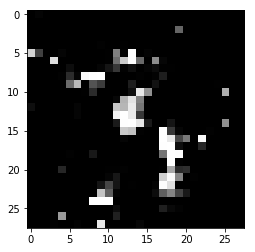

Number batches 78
77(0/78) D: 0.3776, G: 1.2886
77(1/78) D: 0.4450, G: 2.1439
77(2/78) D: 0.4100, G: 1.4729
77(3/78) D: 0.4018, G: 1.8969
77(4/78) D: 0.3403, G: 1.8252
77(5/78) D: 0.3218, G: 2.0881
77(6/78) D: 0.2820, G: 1.9725
77(7/78) D: 0.2774, G: 2.1637
77(8/78) D: 0.4147, G: 1.4183
77(9/78) D: 0.4329, G: 1.7540
77(10/78) D: 0.3493, G: 1.4051
77(11/78) D: 0.2963, G: 2.0664
77(12/78) D: 0.3989, G: 1.7887
77(13/78) D: 0.3407, G: 1.8979
77(14/78) D: 0.2945, G: 1.8264
77(15/78) D: 0.3645, G: 1.9672
77(16/78) D: 0.3371, G: 1.8054
77(17/78) D: 0.3392, G: 1.6508
77(18/78) D: 0.3706, G: 1.8274
77(19/78) D: 0.3145, G: 2.3146
77(20/78) D: 0.3589, G: 1.4479
77(21/78) D: 0.4001, G: 1.8090
77(22/78) D: 0.3951, G: 1.9752
77(23/78) D: 0.3557, G: 1.8833
77(24/78) D: 0.3395, G: 1.5172
77(25/78) D: 0.3979, G: 1.3677
77(26/78) D: 0.3811, G: 2.0616
77(27/78) D: 0.4132, G: 1.6509
77(28/78) D: 0.3144, G: 1.6981
77(29/78) D: 0.3182, G: 2.1893
77(30/78) D: 0.3927, G: 1.2957
77(31/78) D: 0.3873, G: 1.7330


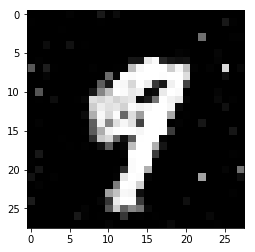

Number batches 78
78(0/78) D: 0.4235, G: 1.5326
78(1/78) D: 0.3771, G: 1.6351
78(2/78) D: 0.4383, G: 1.6548
78(3/78) D: 0.3982, G: 1.8540
78(4/78) D: 0.3939, G: 1.6850
78(5/78) D: 0.3662, G: 1.7093
78(6/78) D: 0.3897, G: 2.4487
78(7/78) D: 0.3750, G: 1.8763
78(8/78) D: 0.3951, G: 1.2010
78(9/78) D: 0.5205, G: 2.2632
78(10/78) D: 0.4035, G: 1.4031
78(11/78) D: 0.3486, G: 1.6652
78(12/78) D: 0.3515, G: 1.6270
78(13/78) D: 0.3738, G: 2.2971
78(14/78) D: 0.3749, G: 1.5384
78(15/78) D: 0.3973, G: 1.7120
78(16/78) D: 0.3449, G: 1.6041
78(17/78) D: 0.3266, G: 1.8692
78(18/78) D: 0.4495, G: 1.2871
78(19/78) D: 0.3928, G: 1.8980
78(20/78) D: 0.3415, G: 1.9136
78(21/78) D: 0.3703, G: 1.4610
78(22/78) D: 0.3543, G: 1.5759
78(23/78) D: 0.3322, G: 1.9146
78(24/78) D: 0.3937, G: 1.6739
78(25/78) D: 0.4115, G: 1.4210
78(26/78) D: 0.4136, G: 2.0323
78(27/78) D: 0.4280, G: 1.3736
78(28/78) D: 0.3847, G: 1.8826
78(29/78) D: 0.3269, G: 1.6815
78(30/78) D: 0.3679, G: 1.6262
78(31/78) D: 0.3717, G: 1.7595


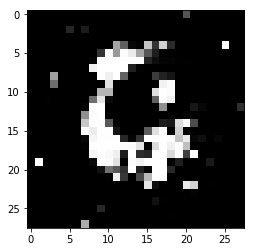

Number batches 78
79(0/78) D: 0.3964, G: 2.0022
79(1/78) D: 0.3953, G: 1.6711
79(2/78) D: 0.4035, G: 1.4576
79(3/78) D: 0.4163, G: 2.2411
79(4/78) D: 0.3774, G: 1.4159
79(5/78) D: 0.3438, G: 1.6005
79(6/78) D: 0.3462, G: 2.3776
79(7/78) D: 0.3164, G: 2.1422
79(8/78) D: 0.4148, G: 1.1013
79(9/78) D: 0.5348, G: 2.3516
79(10/78) D: 0.4749, G: 1.4105
79(11/78) D: 0.3347, G: 1.5670
79(12/78) D: 0.3845, G: 1.8852
79(13/78) D: 0.3351, G: 1.8934
79(14/78) D: 0.3323, G: 1.8221
79(15/78) D: 0.3645, G: 1.6213
79(16/78) D: 0.3541, G: 1.7466
79(17/78) D: 0.2976, G: 2.0457
79(18/78) D: 0.3465, G: 2.1367
79(19/78) D: 0.3384, G: 1.4537
79(20/78) D: 0.3730, G: 2.0138
79(21/78) D: 0.3654, G: 1.8790
79(22/78) D: 0.4061, G: 1.2754
79(23/78) D: 0.3476, G: 2.0173
79(24/78) D: 0.3164, G: 1.4915
79(25/78) D: 0.3925, G: 1.1636
79(26/78) D: 0.3816, G: 2.5812
79(27/78) D: 0.3981, G: 1.7578
79(28/78) D: 0.3383, G: 1.3160
79(29/78) D: 0.4030, G: 2.1923
79(30/78) D: 0.4084, G: 1.5449
79(31/78) D: 0.4117, G: 1.6666


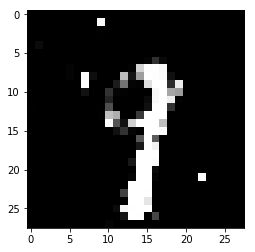

Number batches 78
80(0/78) D: 0.3841, G: 1.3413
80(1/78) D: 0.3999, G: 2.2008
80(2/78) D: 0.4328, G: 1.2946
80(3/78) D: 0.3960, G: 2.0686
80(4/78) D: 0.3627, G: 1.4678
80(5/78) D: 0.3374, G: 1.8458
80(6/78) D: 0.4165, G: 1.7177
80(7/78) D: 0.3404, G: 1.9666
80(8/78) D: 0.3753, G: 1.2295
80(9/78) D: 0.5575, G: 2.0157
80(10/78) D: 0.4462, G: 1.4045
80(11/78) D: 0.3951, G: 1.8989
80(12/78) D: 0.3690, G: 1.4670
80(13/78) D: 0.3637, G: 1.5460
80(14/78) D: 0.3844, G: 1.9535
80(15/78) D: 0.3648, G: 1.3150
80(16/78) D: 0.4295, G: 2.3559
80(17/78) D: 0.3700, G: 1.5308
80(18/78) D: 0.3415, G: 1.7498
80(19/78) D: 0.3624, G: 2.1940
80(20/78) D: 0.3699, G: 1.8078
80(21/78) D: 0.3449, G: 1.3728
80(22/78) D: 0.3783, G: 1.7905
80(23/78) D: 0.2739, G: 1.6882
80(24/78) D: 0.2753, G: 1.5461
80(25/78) D: 0.3743, G: 1.8322
80(26/78) D: 0.3687, G: 2.4469
80(27/78) D: 0.3731, G: 1.3728
80(28/78) D: 0.3515, G: 2.1855
80(29/78) D: 0.3409, G: 1.8967
80(30/78) D: 0.3628, G: 1.4162
80(31/78) D: 0.3693, G: 2.0788


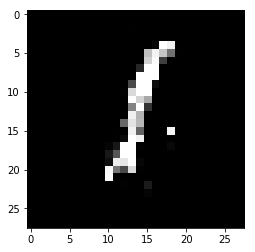

Number batches 78
81(0/78) D: 0.3761, G: 1.2847
81(1/78) D: 0.3707, G: 2.2881
81(2/78) D: 0.4237, G: 1.1453
81(3/78) D: 0.4201, G: 1.9108
81(4/78) D: 0.3936, G: 2.1546
81(5/78) D: 0.3448, G: 1.6091
81(6/78) D: 0.4108, G: 1.6361
81(7/78) D: 0.3299, G: 2.0629
81(8/78) D: 0.4285, G: 1.4166
81(9/78) D: 0.4507, G: 1.7103
81(10/78) D: 0.3854, G: 1.9520
81(11/78) D: 0.3666, G: 1.8219
81(12/78) D: 0.3802, G: 1.5426
81(13/78) D: 0.3477, G: 1.8743
81(14/78) D: 0.3963, G: 1.8196
81(15/78) D: 0.3930, G: 1.6068
81(16/78) D: 0.3943, G: 2.2983
81(17/78) D: 0.3579, G: 1.4633
81(18/78) D: 0.3730, G: 1.9722
81(19/78) D: 0.3680, G: 1.9715
81(20/78) D: 0.3654, G: 1.7234
81(21/78) D: 0.3704, G: 1.6380
81(22/78) D: 0.4117, G: 1.7321
81(23/78) D: 0.3393, G: 1.7709
81(24/78) D: 0.3629, G: 2.1507
81(25/78) D: 0.4278, G: 1.0150
81(26/78) D: 0.5731, G: 2.8107
81(27/78) D: 0.4868, G: 1.5358
81(28/78) D: 0.3074, G: 1.5246
81(29/78) D: 0.3515, G: 1.9006
81(30/78) D: 0.4129, G: 1.4881
81(31/78) D: 0.3778, G: 1.4684


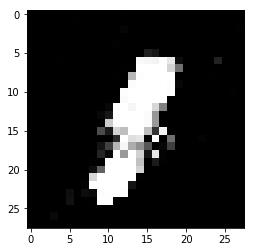

Number batches 78
82(0/78) D: 0.4182, G: 1.4882
82(1/78) D: 0.3769, G: 1.8283
82(2/78) D: 0.3914, G: 1.5590
82(3/78) D: 0.3764, G: 1.8737
82(4/78) D: 0.3763, G: 2.0042
82(5/78) D: 0.4104, G: 1.3004
82(6/78) D: 0.4303, G: 2.6592
82(7/78) D: 0.3934, G: 1.6538
82(8/78) D: 0.4231, G: 1.2689
82(9/78) D: 0.5328, G: 1.8537
82(10/78) D: 0.4034, G: 1.7333
82(11/78) D: 0.3668, G: 1.5572
82(12/78) D: 0.3827, G: 1.7256
82(13/78) D: 0.3797, G: 1.3023
82(14/78) D: 0.3822, G: 2.1636
82(15/78) D: 0.4276, G: 1.3964
82(16/78) D: 0.4421, G: 1.9347
82(17/78) D: 0.3176, G: 1.8908
82(18/78) D: 0.3499, G: 1.6341
82(19/78) D: 0.3507, G: 1.8155
82(20/78) D: 0.3928, G: 2.0769
82(21/78) D: 0.3763, G: 1.1569
82(22/78) D: 0.4164, G: 1.8956
82(23/78) D: 0.3481, G: 1.6876
82(24/78) D: 0.3620, G: 1.4945
82(25/78) D: 0.4420, G: 1.7850
82(26/78) D: 0.3575, G: 1.4361
82(27/78) D: 0.3747, G: 1.5493
82(28/78) D: 0.3514, G: 2.2447
82(29/78) D: 0.4094, G: 1.8041
82(30/78) D: 0.4643, G: 1.3943
82(31/78) D: 0.4232, G: 2.1004


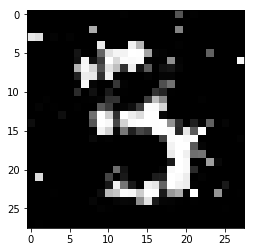

Number batches 78
83(0/78) D: 0.4443, G: 1.0316
83(1/78) D: 0.5373, G: 2.4813
83(2/78) D: 0.4548, G: 1.7410
83(3/78) D: 0.3742, G: 1.4845
83(4/78) D: 0.4275, G: 1.6822
83(5/78) D: 0.4108, G: 1.7330
83(6/78) D: 0.3748, G: 1.5732
83(7/78) D: 0.3545, G: 1.6478
83(8/78) D: 0.4358, G: 1.4446
83(9/78) D: 0.4618, G: 1.5477
83(10/78) D: 0.4137, G: 1.7550
83(11/78) D: 0.3310, G: 1.6810
83(12/78) D: 0.3850, G: 1.4370
83(13/78) D: 0.4568, G: 2.5686
83(14/78) D: 0.4379, G: 1.4379
83(15/78) D: 0.4210, G: 1.4358
83(16/78) D: 0.3409, G: 2.2291
83(17/78) D: 0.3706, G: 1.9108
83(18/78) D: 0.4336, G: 1.5897
83(19/78) D: 0.3852, G: 1.8620
83(20/78) D: 0.3467, G: 1.5660
83(21/78) D: 0.3792, G: 1.8231
83(22/78) D: 0.3469, G: 1.8549
83(23/78) D: 0.3406, G: 1.7312
83(24/78) D: 0.3881, G: 1.6574
83(25/78) D: 0.4192, G: 1.7265
83(26/78) D: 0.3697, G: 1.4559
83(27/78) D: 0.3653, G: 1.8954
83(28/78) D: 0.3507, G: 1.5927
83(29/78) D: 0.3607, G: 1.8708
83(30/78) D: 0.3780, G: 1.5451
83(31/78) D: 0.3940, G: 1.7798


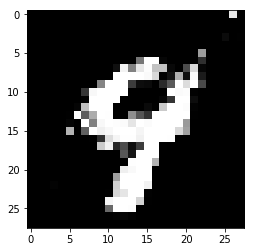

Number batches 78
84(0/78) D: 0.4195, G: 1.1423
84(1/78) D: 0.4432, G: 1.8880
84(2/78) D: 0.3802, G: 1.6928
84(3/78) D: 0.3655, G: 1.5605
84(4/78) D: 0.3856, G: 1.8103
84(5/78) D: 0.3967, G: 1.6954
84(6/78) D: 0.3658, G: 1.9843
84(7/78) D: 0.3568, G: 1.7101
84(8/78) D: 0.3938, G: 1.4670
84(9/78) D: 0.5261, G: 1.7979
84(10/78) D: 0.4717, G: 1.4844
84(11/78) D: 0.3372, G: 1.8088
84(12/78) D: 0.3785, G: 1.6891
84(13/78) D: 0.4000, G: 1.7974
84(14/78) D: 0.3599, G: 1.4739
84(15/78) D: 0.3830, G: 1.5951
84(16/78) D: 0.3630, G: 1.9001
84(17/78) D: 0.3360, G: 2.2898
84(18/78) D: 0.5021, G: 1.0123
84(19/78) D: 0.4077, G: 1.6851
84(20/78) D: 0.3991, G: 2.0009
84(21/78) D: 0.4144, G: 1.4011
84(22/78) D: 0.4553, G: 1.7562
84(23/78) D: 0.3586, G: 1.7983
84(24/78) D: 0.3333, G: 1.5357
84(25/78) D: 0.4141, G: 1.4553
84(26/78) D: 0.4513, G: 2.4150
84(27/78) D: 0.4428, G: 1.3717
84(28/78) D: 0.3960, G: 1.5715
84(29/78) D: 0.3494, G: 1.7620
84(30/78) D: 0.3601, G: 1.6820
84(31/78) D: 0.3454, G: 1.7741


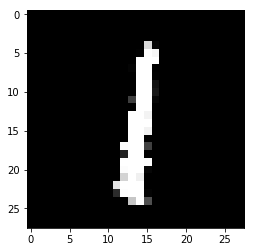

Number batches 78
85(0/78) D: 0.3982, G: 1.6703
85(1/78) D: 0.3763, G: 1.5262
85(2/78) D: 0.3991, G: 1.5553
85(3/78) D: 0.3768, G: 1.9466
85(4/78) D: 0.3659, G: 1.2993
85(5/78) D: 0.4020, G: 2.4369
85(6/78) D: 0.4181, G: 1.5125
85(7/78) D: 0.3857, G: 1.8024
85(8/78) D: 0.4609, G: 1.8160
85(9/78) D: 0.4889, G: 1.1018
85(10/78) D: 0.4407, G: 1.5569
85(11/78) D: 0.3549, G: 1.8728
85(12/78) D: 0.3989, G: 1.6038
85(13/78) D: 0.4044, G: 1.4409
85(14/78) D: 0.3997, G: 1.9477
85(15/78) D: 0.4212, G: 1.5371
85(16/78) D: 0.3795, G: 1.9354
85(17/78) D: 0.3272, G: 1.8547
85(18/78) D: 0.3867, G: 1.4508
85(19/78) D: 0.3557, G: 2.0137
85(20/78) D: 0.3825, G: 1.7042
85(21/78) D: 0.4199, G: 1.4621
85(22/78) D: 0.3661, G: 1.5914
85(23/78) D: 0.3385, G: 2.0146
85(24/78) D: 0.3984, G: 1.7715
85(25/78) D: 0.4442, G: 1.3178
85(26/78) D: 0.4812, G: 2.9018
85(27/78) D: 0.5679, G: 1.0335
85(28/78) D: 0.4470, G: 1.7213
85(29/78) D: 0.3444, G: 1.7549
85(30/78) D: 0.3562, G: 1.4360
85(31/78) D: 0.3418, G: 1.6907


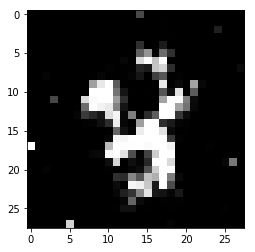

Number batches 78
86(0/78) D: 0.4504, G: 1.6165
86(1/78) D: 0.3509, G: 1.8480
86(2/78) D: 0.3687, G: 1.6282
86(3/78) D: 0.3123, G: 1.6643
86(4/78) D: 0.4181, G: 1.8713
86(5/78) D: 0.3278, G: 1.6586
86(6/78) D: 0.3842, G: 2.0313
86(7/78) D: 0.3550, G: 2.1376
86(8/78) D: 0.4981, G: 1.0867
86(9/78) D: 0.4989, G: 2.2497
86(10/78) D: 0.4889, G: 1.2294
86(11/78) D: 0.4718, G: 1.8928
86(12/78) D: 0.4332, G: 1.8026
86(13/78) D: 0.4347, G: 1.6215
86(14/78) D: 0.4182, G: 1.7122
86(15/78) D: 0.3814, G: 1.7784
86(16/78) D: 0.3484, G: 1.7421
86(17/78) D: 0.3522, G: 1.9311
86(18/78) D: 0.4584, G: 1.5121
86(19/78) D: 0.4053, G: 1.7374
86(20/78) D: 0.3579, G: 1.7200
86(21/78) D: 0.3443, G: 1.4330
86(22/78) D: 0.3803, G: 1.5800
86(23/78) D: 0.3679, G: 2.2936
86(24/78) D: 0.4641, G: 1.1574
86(25/78) D: 0.4894, G: 1.9801
86(26/78) D: 0.4131, G: 1.8032
86(27/78) D: 0.4052, G: 1.2393
86(28/78) D: 0.3607, G: 1.8249
86(29/78) D: 0.3569, G: 1.9673
86(30/78) D: 0.3876, G: 1.2038
86(31/78) D: 0.4116, G: 1.7299


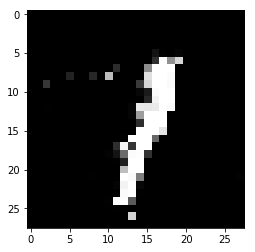

Number batches 78
87(0/78) D: 0.4343, G: 1.1634
87(1/78) D: 0.4150, G: 2.4713
87(2/78) D: 0.4634, G: 1.3129
87(3/78) D: 0.4282, G: 2.0546
87(4/78) D: 0.4328, G: 1.6874
87(5/78) D: 0.3325, G: 1.7497
87(6/78) D: 0.3816, G: 1.8818
87(7/78) D: 0.3407, G: 1.7219
87(8/78) D: 0.4371, G: 1.5872
87(9/78) D: 0.4858, G: 1.5191
87(10/78) D: 0.4674, G: 1.7944
87(11/78) D: 0.3901, G: 1.6010
87(12/78) D: 0.4169, G: 2.1634
87(13/78) D: 0.4341, G: 1.4524
87(14/78) D: 0.4145, G: 1.6485
87(15/78) D: 0.3884, G: 2.0830
87(16/78) D: 0.3667, G: 1.3681
87(17/78) D: 0.3230, G: 1.8200
87(18/78) D: 0.4938, G: 1.6439
87(19/78) D: 0.4290, G: 1.5741
87(20/78) D: 0.3501, G: 1.7753
87(21/78) D: 0.4312, G: 1.7762
87(22/78) D: 0.3989, G: 1.4015
87(23/78) D: 0.3560, G: 2.1853
87(24/78) D: 0.4063, G: 1.3753
87(25/78) D: 0.3847, G: 1.1045
87(26/78) D: 0.4125, G: 2.5344
87(27/78) D: 0.5075, G: 1.2173
87(28/78) D: 0.3969, G: 1.8541
87(29/78) D: 0.3725, G: 1.8494
87(30/78) D: 0.3821, G: 1.3209
87(31/78) D: 0.4118, G: 1.7058


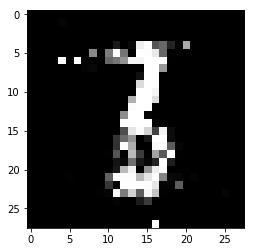

Number batches 78
88(0/78) D: 0.4552, G: 1.5381
88(1/78) D: 0.3526, G: 1.7444
88(2/78) D: 0.3948, G: 1.6920
88(3/78) D: 0.3095, G: 1.4540
88(4/78) D: 0.3740, G: 2.0614
88(5/78) D: 0.4353, G: 1.7383
88(6/78) D: 0.3928, G: 1.5058
88(7/78) D: 0.3694, G: 2.3047
88(8/78) D: 0.4941, G: 0.8809
88(9/78) D: 0.5915, G: 2.1118
88(10/78) D: 0.4465, G: 2.0454
88(11/78) D: 0.3924, G: 1.0472
88(12/78) D: 0.4716, G: 2.0591
88(13/78) D: 0.4393, G: 1.7577
88(14/78) D: 0.3721, G: 1.3246
88(15/78) D: 0.3440, G: 1.6288
88(16/78) D: 0.3440, G: 2.2367
88(17/78) D: 0.3347, G: 1.7455
88(18/78) D: 0.3710, G: 1.3382
88(19/78) D: 0.3948, G: 1.9041
88(20/78) D: 0.3864, G: 1.7899
88(21/78) D: 0.3893, G: 1.7075
88(22/78) D: 0.4127, G: 1.4329
88(23/78) D: 0.3467, G: 1.7551
88(24/78) D: 0.3672, G: 1.4939
88(25/78) D: 0.3841, G: 1.4678
88(26/78) D: 0.3900, G: 2.2228
88(27/78) D: 0.4484, G: 1.3902
88(28/78) D: 0.3961, G: 2.0099
88(29/78) D: 0.4092, G: 1.5558
88(30/78) D: 0.4059, G: 1.3089
88(31/78) D: 0.4854, G: 1.8657


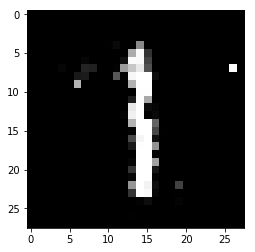

Number batches 78
89(0/78) D: 0.3923, G: 1.6204
89(1/78) D: 0.3921, G: 1.8843
89(2/78) D: 0.4336, G: 1.2615
89(3/78) D: 0.3903, G: 1.9989
89(4/78) D: 0.4092, G: 1.5617
89(5/78) D: 0.4279, G: 1.8145
89(6/78) D: 0.3560, G: 1.9481
89(7/78) D: 0.4075, G: 1.7236
89(8/78) D: 0.4014, G: 1.5489
89(9/78) D: 0.5219, G: 1.4290
89(10/78) D: 0.4264, G: 1.7672
89(11/78) D: 0.3584, G: 1.9653
89(12/78) D: 0.3677, G: 1.5216
89(13/78) D: 0.3852, G: 1.9790
89(14/78) D: 0.4294, G: 1.8232
89(15/78) D: 0.3388, G: 1.5086
89(16/78) D: 0.3534, G: 2.0615
89(17/78) D: 0.3776, G: 1.7343
89(18/78) D: 0.4085, G: 1.4034
89(19/78) D: 0.3807, G: 1.7365
89(20/78) D: 0.3609, G: 1.6967
89(21/78) D: 0.3622, G: 1.5176
89(22/78) D: 0.4473, G: 1.8536
89(23/78) D: 0.3451, G: 1.7118
89(24/78) D: 0.3948, G: 2.0395
89(25/78) D: 0.5047, G: 0.8380
89(26/78) D: 0.5381, G: 2.5392
89(27/78) D: 0.4598, G: 1.6895
89(28/78) D: 0.3878, G: 1.3165
89(29/78) D: 0.3782, G: 1.7383
89(30/78) D: 0.4032, G: 1.5719
89(31/78) D: 0.3669, G: 1.5705


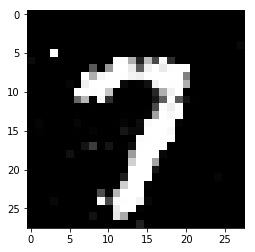

Number batches 78
90(0/78) D: 0.4445, G: 1.3121
90(1/78) D: 0.3874, G: 1.5679
90(2/78) D: 0.4239, G: 1.7294
90(3/78) D: 0.3834, G: 1.7076
90(4/78) D: 0.3610, G: 1.5469
90(5/78) D: 0.3983, G: 1.3484
90(6/78) D: 0.4383, G: 1.9939
90(7/78) D: 0.4038, G: 1.7458
90(8/78) D: 0.4036, G: 0.9916
90(9/78) D: 0.5305, G: 2.1112
90(10/78) D: 0.4368, G: 1.7314
90(11/78) D: 0.3556, G: 1.2558
90(12/78) D: 0.4509, G: 1.6147
90(13/78) D: 0.3925, G: 1.5291
90(14/78) D: 0.4231, G: 1.5173
90(15/78) D: 0.3628, G: 1.7956
90(16/78) D: 0.4081, G: 1.3711
90(17/78) D: 0.3487, G: 1.9570
90(18/78) D: 0.4011, G: 1.4611
90(19/78) D: 0.4281, G: 1.5141
90(20/78) D: 0.3719, G: 1.8773
90(21/78) D: 0.4078, G: 1.4879
90(22/78) D: 0.3982, G: 1.4262
90(23/78) D: 0.3851, G: 2.4683
90(24/78) D: 0.4418, G: 1.3897
90(25/78) D: 0.4067, G: 1.2024
90(26/78) D: 0.4125, G: 2.2301
90(27/78) D: 0.4145, G: 1.5914
90(28/78) D: 0.3437, G: 1.5791
90(29/78) D: 0.4133, G: 1.8548
90(30/78) D: 0.4021, G: 1.6675
90(31/78) D: 0.3848, G: 1.4876


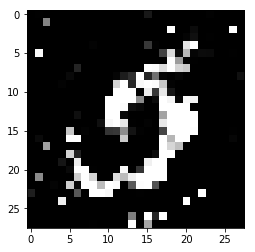

Number batches 78
91(0/78) D: 0.4040, G: 1.1953
91(1/78) D: 0.4088, G: 1.7554
91(2/78) D: 0.4268, G: 1.6861
91(3/78) D: 0.3492, G: 1.3208
91(4/78) D: 0.3903, G: 2.0103
91(5/78) D: 0.4084, G: 1.3296
91(6/78) D: 0.3888, G: 1.6771
91(7/78) D: 0.3263, G: 2.1385
91(8/78) D: 0.4978, G: 1.0086
91(9/78) D: 0.5305, G: 2.1097
91(10/78) D: 0.4747, G: 1.5201
91(11/78) D: 0.4179, G: 1.5280
91(12/78) D: 0.4314, G: 1.7672
91(13/78) D: 0.4240, G: 1.9000
91(14/78) D: 0.3913, G: 1.4254
91(15/78) D: 0.3790, G: 1.5945
91(16/78) D: 0.3674, G: 1.9563
91(17/78) D: 0.3721, G: 1.5602
91(18/78) D: 0.4979, G: 1.6785
91(19/78) D: 0.4060, G: 1.4388
91(20/78) D: 0.3584, G: 1.8015
91(21/78) D: 0.4435, G: 1.7336
91(22/78) D: 0.4269, G: 1.4645
91(23/78) D: 0.3648, G: 2.1905
91(24/78) D: 0.3629, G: 1.6866
91(25/78) D: 0.4121, G: 1.1715
91(26/78) D: 0.4077, G: 1.9745
91(27/78) D: 0.4460, G: 1.8135
91(28/78) D: 0.3617, G: 1.6240
91(29/78) D: 0.3645, G: 1.6032
91(30/78) D: 0.4107, G: 1.5281
91(31/78) D: 0.4087, G: 1.9372


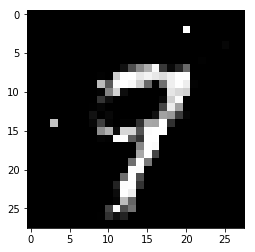

Number batches 78
92(0/78) D: 0.3884, G: 1.4725
92(1/78) D: 0.3832, G: 1.6510
92(2/78) D: 0.4217, G: 1.5041
92(3/78) D: 0.3906, G: 1.7226
92(4/78) D: 0.4069, G: 1.3307
92(5/78) D: 0.4291, G: 2.0376
92(6/78) D: 0.4187, G: 1.3706
92(7/78) D: 0.4614, G: 1.8808
92(8/78) D: 0.4577, G: 1.3051
92(9/78) D: 0.3961, G: 1.2131
92(10/78) D: 0.4095, G: 1.9443
92(11/78) D: 0.3977, G: 1.7115
92(12/78) D: 0.4301, G: 1.4502
92(13/78) D: 0.3763, G: 1.9054
92(14/78) D: 0.4208, G: 1.2573
92(15/78) D: 0.4617, G: 2.1142
92(16/78) D: 0.4288, G: 1.6135
92(17/78) D: 0.3306, G: 1.7515
92(18/78) D: 0.4449, G: 1.3684
92(19/78) D: 0.5211, G: 1.7422
92(20/78) D: 0.4208, G: 1.8861
92(21/78) D: 0.4415, G: 1.4584
92(22/78) D: 0.4338, G: 1.4992
92(23/78) D: 0.4000, G: 1.7622
92(24/78) D: 0.3669, G: 1.4724
92(25/78) D: 0.4080, G: 1.6989
92(26/78) D: 0.4105, G: 1.9789
92(27/78) D: 0.4087, G: 1.3496
92(28/78) D: 0.3991, G: 1.7684
92(29/78) D: 0.3820, G: 1.5494
92(30/78) D: 0.4807, G: 1.5540
92(31/78) D: 0.4042, G: 1.4105


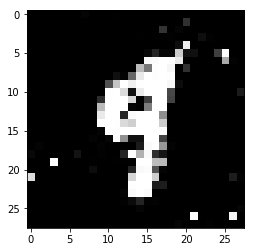

Number batches 78
93(0/78) D: 0.3988, G: 1.8606
93(1/78) D: 0.3501, G: 1.9156
93(2/78) D: 0.4215, G: 1.0382
93(3/78) D: 0.4387, G: 2.1534
93(4/78) D: 0.3875, G: 1.7707
93(5/78) D: 0.3444, G: 1.3870
93(6/78) D: 0.3963, G: 2.1231
93(7/78) D: 0.3519, G: 1.6674
93(8/78) D: 0.4497, G: 1.2534
93(9/78) D: 0.3894, G: 1.8768
93(10/78) D: 0.4549, G: 1.6729
93(11/78) D: 0.3576, G: 1.5971
93(12/78) D: 0.3717, G: 1.6769
93(13/78) D: 0.4091, G: 1.6007
93(14/78) D: 0.4260, G: 2.2338
93(15/78) D: 0.4205, G: 1.5601
93(16/78) D: 0.3761, G: 1.8155
93(17/78) D: 0.3414, G: 2.6095
93(18/78) D: 0.5696, G: 1.0921
93(19/78) D: 0.4474, G: 1.8326
93(20/78) D: 0.3420, G: 1.9581
93(21/78) D: 0.4336, G: 1.2529
93(22/78) D: 0.4035, G: 1.6502
93(23/78) D: 0.3530, G: 2.0244
93(24/78) D: 0.3919, G: 1.4556
93(25/78) D: 0.3632, G: 1.3856
93(26/78) D: 0.3761, G: 1.7719
93(27/78) D: 0.3781, G: 1.7382
93(28/78) D: 0.3716, G: 1.8456
93(29/78) D: 0.4116, G: 1.6767
93(30/78) D: 0.4065, G: 1.5470
93(31/78) D: 0.4291, G: 1.8496


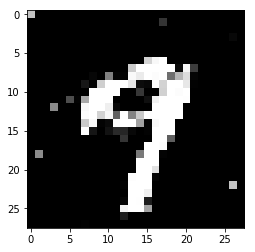

Number batches 78
94(0/78) D: 0.4191, G: 1.2802
94(1/78) D: 0.4091, G: 1.6811
94(2/78) D: 0.3620, G: 1.7235
94(3/78) D: 0.4276, G: 1.6930
94(4/78) D: 0.3365, G: 1.3661
94(5/78) D: 0.4354, G: 1.7010
94(6/78) D: 0.3755, G: 1.5864
94(7/78) D: 0.4153, G: 2.0390
94(8/78) D: 0.4581, G: 1.2630
94(9/78) D: 0.5238, G: 2.2661
94(10/78) D: 0.4589, G: 1.2209
94(11/78) D: 0.4857, G: 1.8616
94(12/78) D: 0.3807, G: 1.5144
94(13/78) D: 0.4088, G: 1.6501
94(14/78) D: 0.4399, G: 1.9913
94(15/78) D: 0.4322, G: 1.4263
94(16/78) D: 0.3804, G: 1.7585
94(17/78) D: 0.3131, G: 2.1658
94(18/78) D: 0.4700, G: 1.1750
94(19/78) D: 0.4528, G: 1.7528
94(20/78) D: 0.4375, G: 1.8188
94(21/78) D: 0.3844, G: 1.4190
94(22/78) D: 0.3925, G: 1.6475
94(23/78) D: 0.3345, G: 1.6346
94(24/78) D: 0.3789, G: 1.4356
94(25/78) D: 0.4902, G: 1.3738
94(26/78) D: 0.4444, G: 2.0142
94(27/78) D: 0.4002, G: 1.3633
94(28/78) D: 0.3660, G: 1.6316
94(29/78) D: 0.3768, G: 1.8675
94(30/78) D: 0.4346, G: 1.5924
94(31/78) D: 0.4003, G: 1.4618


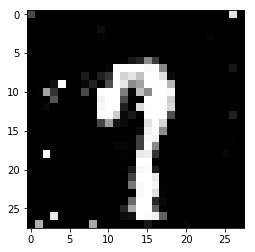

Number batches 78
95(0/78) D: 0.4202, G: 1.9003
95(1/78) D: 0.3847, G: 1.7092
95(2/78) D: 0.3950, G: 1.6249
95(3/78) D: 0.3447, G: 1.7246
95(4/78) D: 0.3541, G: 1.7441
95(5/78) D: 0.3944, G: 1.9841
95(6/78) D: 0.3755, G: 1.5513
95(7/78) D: 0.4108, G: 2.4178
95(8/78) D: 0.4418, G: 1.2722
95(9/78) D: 0.4329, G: 1.6773
95(10/78) D: 0.4321, G: 1.8705
95(11/78) D: 0.4003, G: 1.6845
95(12/78) D: 0.3472, G: 1.4925
95(13/78) D: 0.3797, G: 1.8365
95(14/78) D: 0.4035, G: 1.4015
95(15/78) D: 0.4112, G: 2.0676
95(16/78) D: 0.3919, G: 1.5395
95(17/78) D: 0.3805, G: 1.9004
95(18/78) D: 0.4253, G: 1.8484
95(19/78) D: 0.4203, G: 1.5970
95(20/78) D: 0.3533, G: 1.9718
95(21/78) D: 0.4101, G: 1.4597
95(22/78) D: 0.3822, G: 1.7555
95(23/78) D: 0.3597, G: 1.7868
95(24/78) D: 0.3916, G: 1.2322
95(25/78) D: 0.4528, G: 1.5565
95(26/78) D: 0.4213, G: 2.0310
95(27/78) D: 0.4097, G: 1.6141
95(28/78) D: 0.3789, G: 1.7439
95(29/78) D: 0.4072, G: 1.3484
95(30/78) D: 0.3923, G: 1.3497
95(31/78) D: 0.4218, G: 1.9651


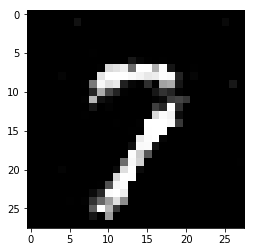

Number batches 78
96(0/78) D: 0.4315, G: 1.6373
96(1/78) D: 0.4598, G: 1.8855
96(2/78) D: 0.4887, G: 1.0201
96(3/78) D: 0.5165, G: 1.7745
96(4/78) D: 0.4110, G: 1.5593
96(5/78) D: 0.4605, G: 1.4280
96(6/78) D: 0.3885, G: 1.7099
96(7/78) D: 0.3557, G: 1.5809
96(8/78) D: 0.4546, G: 1.7002
96(9/78) D: 0.4194, G: 1.6512
96(10/78) D: 0.3916, G: 1.5394
96(11/78) D: 0.3601, G: 1.8257
96(12/78) D: 0.3853, G: 1.4167
96(13/78) D: 0.4236, G: 1.5030
96(14/78) D: 0.4495, G: 2.1880
96(15/78) D: 0.4406, G: 1.2404
96(16/78) D: 0.4439, G: 1.5658
96(17/78) D: 0.3656, G: 2.1397
96(18/78) D: 0.5147, G: 1.1512
96(19/78) D: 0.4388, G: 1.4284
96(20/78) D: 0.3552, G: 1.6769
96(21/78) D: 0.4277, G: 1.3139
96(22/78) D: 0.4130, G: 1.5339
96(23/78) D: 0.3911, G: 1.9249
96(24/78) D: 0.3956, G: 1.1988
96(25/78) D: 0.4896, G: 1.7078
96(26/78) D: 0.4457, G: 1.5759
96(27/78) D: 0.4060, G: 1.4828
96(28/78) D: 0.3694, G: 1.7077
96(29/78) D: 0.3994, G: 1.5382
96(30/78) D: 0.4543, G: 1.9825
96(31/78) D: 0.3968, G: 1.4708


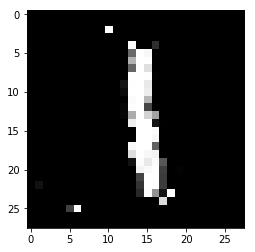

Number batches 78
97(0/78) D: 0.4346, G: 1.4160
97(1/78) D: 0.4272, G: 1.4757
97(2/78) D: 0.4117, G: 1.6884
97(3/78) D: 0.3457, G: 1.5861
97(4/78) D: 0.3788, G: 1.4206
97(5/78) D: 0.4138, G: 1.8095
97(6/78) D: 0.3884, G: 1.5449
97(7/78) D: 0.3671, G: 1.9102
97(8/78) D: 0.4395, G: 1.2109
97(9/78) D: 0.4623, G: 2.0126
97(10/78) D: 0.4623, G: 1.6744
97(11/78) D: 0.3656, G: 1.7830
97(12/78) D: 0.4477, G: 1.8218
97(13/78) D: 0.4458, G: 1.3107
97(14/78) D: 0.4279, G: 1.9234
97(15/78) D: 0.4225, G: 1.7150
97(16/78) D: 0.4052, G: 1.6511
97(17/78) D: 0.3871, G: 2.0379
97(18/78) D: 0.3831, G: 1.3369
97(19/78) D: 0.3992, G: 2.1069
97(20/78) D: 0.4556, G: 1.3207
97(21/78) D: 0.4108, G: 1.5276
97(22/78) D: 0.4095, G: 1.5852
97(23/78) D: 0.3559, G: 1.8616
97(24/78) D: 0.3992, G: 1.3605
97(25/78) D: 0.4279, G: 1.4298
97(26/78) D: 0.3972, G: 2.2948
97(27/78) D: 0.4730, G: 1.2951
97(28/78) D: 0.3847, G: 1.8930
97(29/78) D: 0.4196, G: 1.6204
97(30/78) D: 0.4608, G: 1.5471
97(31/78) D: 0.3797, G: 1.6728


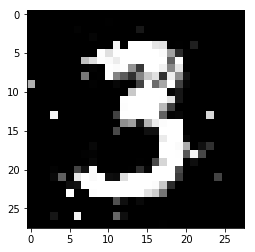

Number batches 78
98(0/78) D: 0.5137, G: 1.1757
98(1/78) D: 0.4217, G: 1.4773
98(2/78) D: 0.4511, G: 1.6900
98(3/78) D: 0.4251, G: 1.5543
98(4/78) D: 0.3800, G: 1.2712
98(5/78) D: 0.4137, G: 1.6649
98(6/78) D: 0.3743, G: 1.5778
98(7/78) D: 0.3440, G: 1.6955
98(8/78) D: 0.4367, G: 1.6363
98(9/78) D: 0.4573, G: 1.6946
98(10/78) D: 0.4652, G: 1.5566
98(11/78) D: 0.3928, G: 1.7920
98(12/78) D: 0.4153, G: 1.4107
98(13/78) D: 0.4723, G: 1.9715
98(14/78) D: 0.3839, G: 1.6732
98(15/78) D: 0.4526, G: 1.9674
98(16/78) D: 0.3531, G: 1.4125
98(17/78) D: 0.3919, G: 1.8746
98(18/78) D: 0.4564, G: 1.4274
98(19/78) D: 0.4271, G: 1.8063
98(20/78) D: 0.4165, G: 1.3563
98(21/78) D: 0.4431, G: 1.7323
98(22/78) D: 0.4409, G: 1.6618
98(23/78) D: 0.3871, G: 1.5182
98(24/78) D: 0.3844, G: 1.5793
98(25/78) D: 0.4406, G: 1.5139
98(26/78) D: 0.4049, G: 1.7296
98(27/78) D: 0.3880, G: 1.4151
98(28/78) D: 0.3706, G: 1.9877
98(29/78) D: 0.4505, G: 1.7860
98(30/78) D: 0.4188, G: 1.4302
98(31/78) D: 0.4099, G: 1.8333


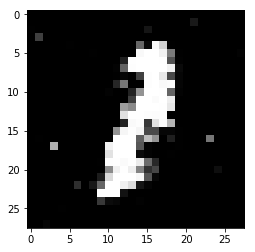

Number batches 78
99(0/78) D: 0.3618, G: 1.6935
99(1/78) D: 0.3837, G: 1.4937
99(2/78) D: 0.4361, G: 1.8472
99(3/78) D: 0.3687, G: 1.7632
99(4/78) D: 0.4202, G: 1.7151
99(5/78) D: 0.4526, G: 1.6740
99(6/78) D: 0.3703, G: 1.8269
99(7/78) D: 0.3689, G: 2.2482
99(8/78) D: 0.4537, G: 0.9329
99(9/78) D: 0.5465, G: 2.2665
99(10/78) D: 0.5299, G: 1.4526
99(11/78) D: 0.4727, G: 2.4262
99(12/78) D: 0.4616, G: 1.7307
99(13/78) D: 0.4166, G: 1.2879
99(14/78) D: 0.4148, G: 1.7101
99(15/78) D: 0.4223, G: 1.5512
99(16/78) D: 0.3799, G: 1.7413
99(17/78) D: 0.3178, G: 1.8826
99(18/78) D: 0.4041, G: 1.5354
99(19/78) D: 0.3812, G: 1.4090
99(20/78) D: 0.3965, G: 1.8867
99(21/78) D: 0.4728, G: 1.3280
99(22/78) D: 0.4557, G: 1.3952
99(23/78) D: 0.3416, G: 1.8990
99(24/78) D: 0.3476, G: 1.4463
99(25/78) D: 0.4343, G: 1.5793
99(26/78) D: 0.3714, G: 1.8047
99(27/78) D: 0.4285, G: 1.5147
99(28/78) D: 0.4402, G: 1.9012
99(29/78) D: 0.4077, G: 1.5291
99(30/78) D: 0.4771, G: 1.7558
99(31/78) D: 0.4109, G: 1.3143


In [132]:
# Keep this. 
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        #######################################################
        #TODO: Complete a training iteration
        # Generate noise.
        # noise = None
        noise = np.random.uniform(-1, 1, size=(batch_size, 100))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise, verbose=0)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Train the discriminator using the generated images and the real images.
        
        # Real or the fake image.
        #X = None
        
        # Labels if the sample is real (1) or not real (0). 
        #y = None
        
        # Remember that the discriminator has to have d.trainable = True!
        #d_loss = d.train_on_batch(X, y)
        
        X = np.concatenate((real_images, generated_images))
        y = [1] * batch_size + [0] * batch_size
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise
        # noise = None
        noise = np.random.uniform(-1, 1, (batch_size, 100))
        
        # Get the g_loss (fill in the ... part between the parantheses)
        # g_loss = dg.train_on_batch(...)
        g_loss = dg.train_on_batch(noise, [1] * batch_size)
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))
        
        #######################################################

#########################################################################################
# Why is my generative loss oscillating???   
# Don't worry this is normal as the generator is oscillating between possible solutions
#########################################################################################
        